In [1]:
import networkx as nx

import PyGenStability as pgs

import numpy as np
import networkx as nx
import pylab as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


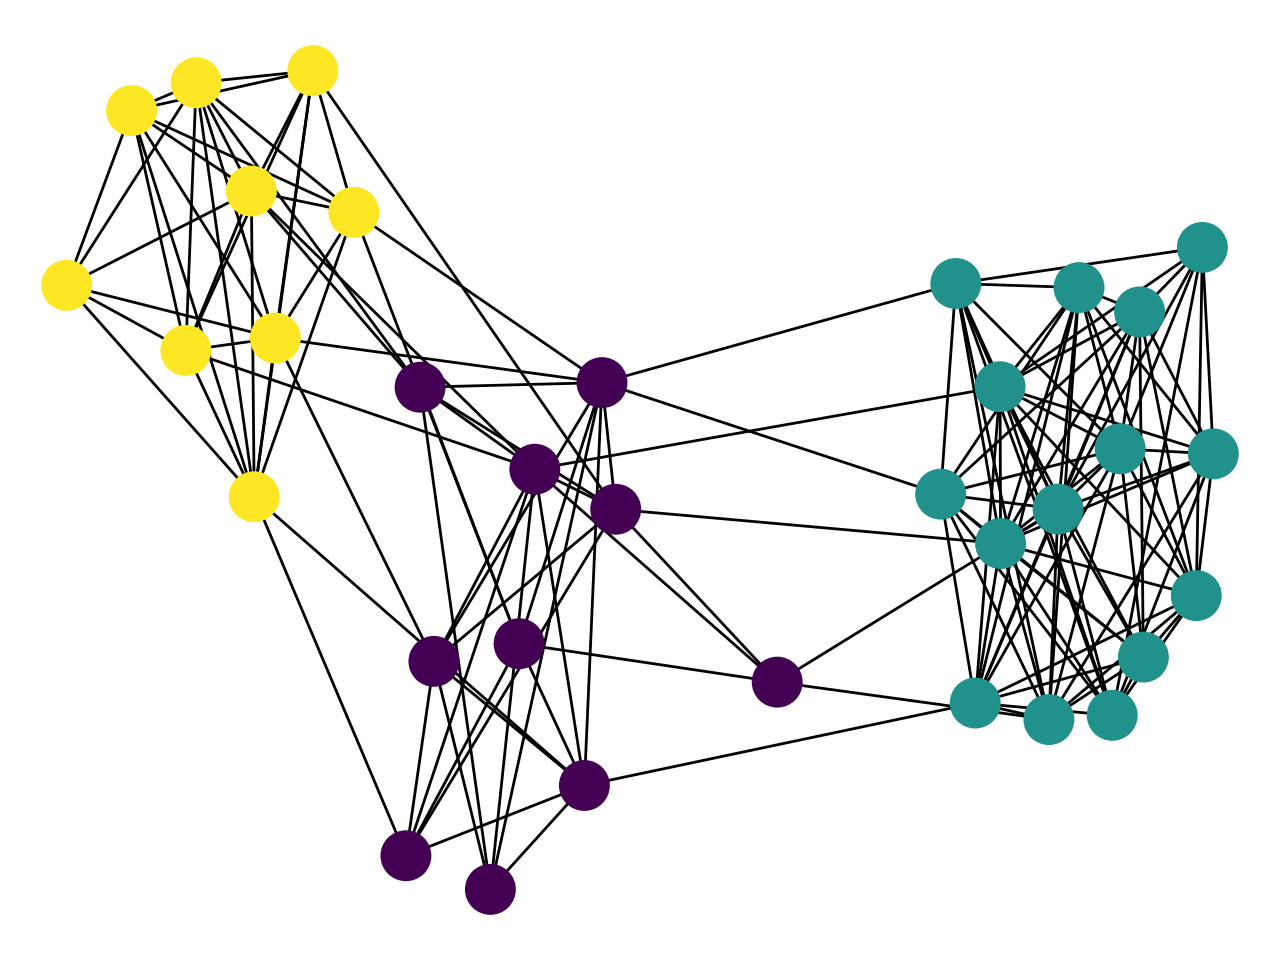

/home/arnaudon/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


In [2]:
%matplotlib notebook 

#set a SBM model
sizes = [10, 15, 9]
probs = [[0.7, 0.05, 0.08],   
         [0.05, 0.8, 0.02],   
         [0.08, 0.02, 0.80]]
G = nx.stochastic_block_model(sizes, probs, seed=0)

#need to set the weights to 1
for i,j in G.edges():
    G[i][j]['weight'] = 1

#ground truth
community_labels = [G.node[i]['block'] for i in G]

#spring layout
pos = nx.spring_layout(G,weight=None,scale=1)
    
    
plt.figure()
nx.draw(G,pos=pos,node_color=community_labels)

In [3]:
louvain_runs = 50
precision = 1e-6

# possible choices of type of clustering:
# continuous_combinatorial: continuous RW with combintaorial Laplacian
# continuous_normalized:    continuous RW with normalized Laplacian
# linearized:               modularity with time parameter
# modulatirty_signed:       modularity of signed networks, (Arenas et al. 2008)

stability = pgs.PyGenStability(G,'continuous_combinatorial', louvain_runs , precision) 

#stability.cpp_folder = '/home/arnaudon/codes/PyGenStability' #set the folder where the code is
stability.all_mi = False #to compute MI between al Louvain
stability.n_mi = 10  #if all_mi = False, number of top Louvai run to use for MI

#number of cpu for parallel compuations
stability.n_processes_louv = 2
stability.n_processes_mi = 2

stability.post_process = True #apply the postprocessing


#run a single time, and print result
stability.run_single_stability(time = 1.)
stability.print_single_result(1, 1)

Step  1 / 1
T      =  1.0
N_comm =  2
MI     =  1.0
Q      =  0.975


In [42]:
#scan over a time interval
times = np.logspace(-2.5, 1.5, 100)
stability.n_neigh = len(times) #but here, this is supposed to only look for a few neighbour times for the postprocess

stability.scan_stability(times, disp=False)

  0%|          | 0/100 [00:00<?, ?it/s]

Apply postprocessing...


100%|██████████| 100/100 [00:16<00:00,  6.00it/s]


In [43]:
stability.plot_scan()
plt.savefig('scan_results.svg', bbox_inches='tight')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


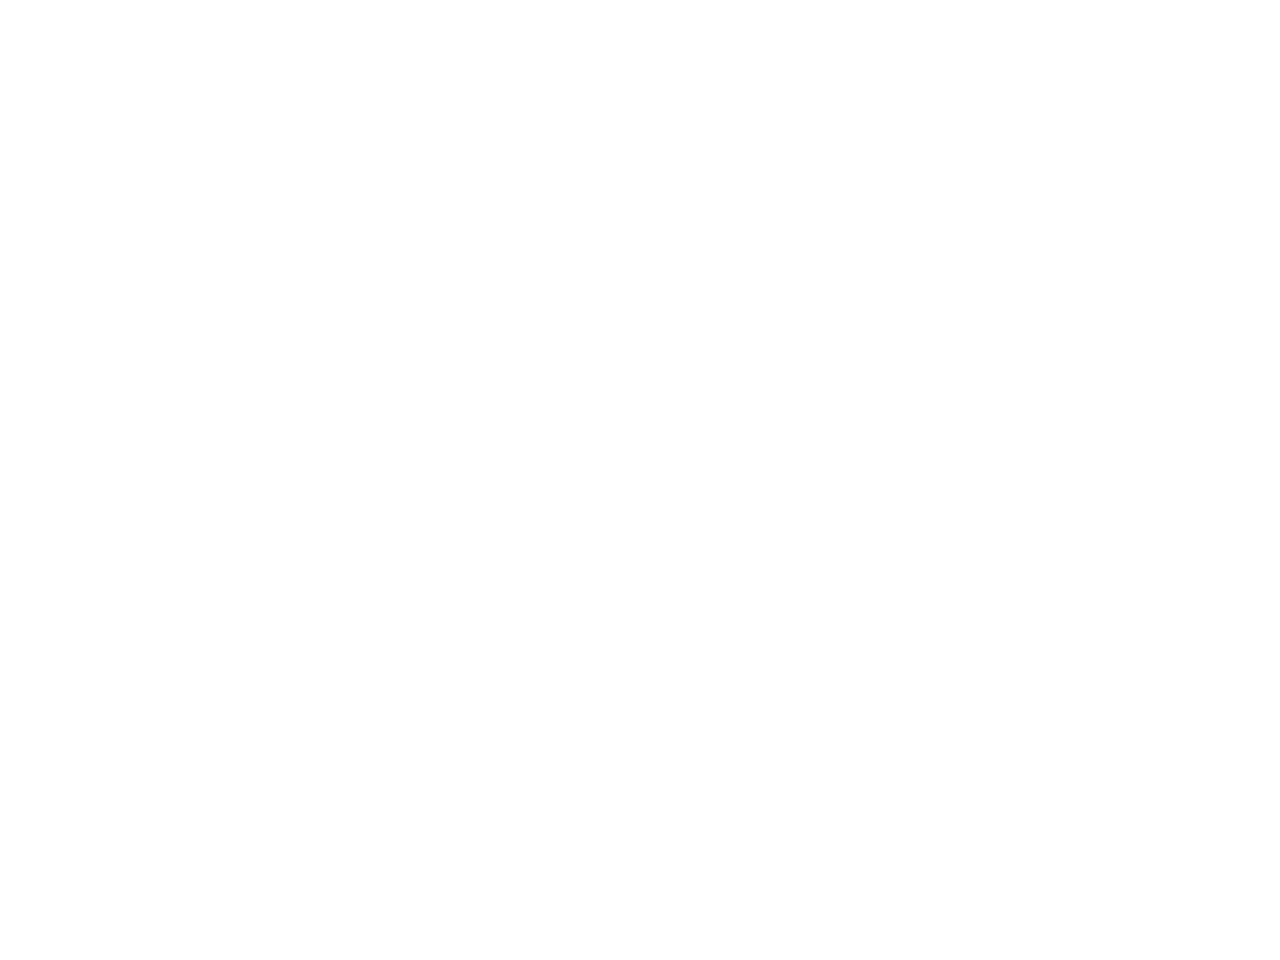

/home/arnaudon/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<IPython.core.display.Javascript object>


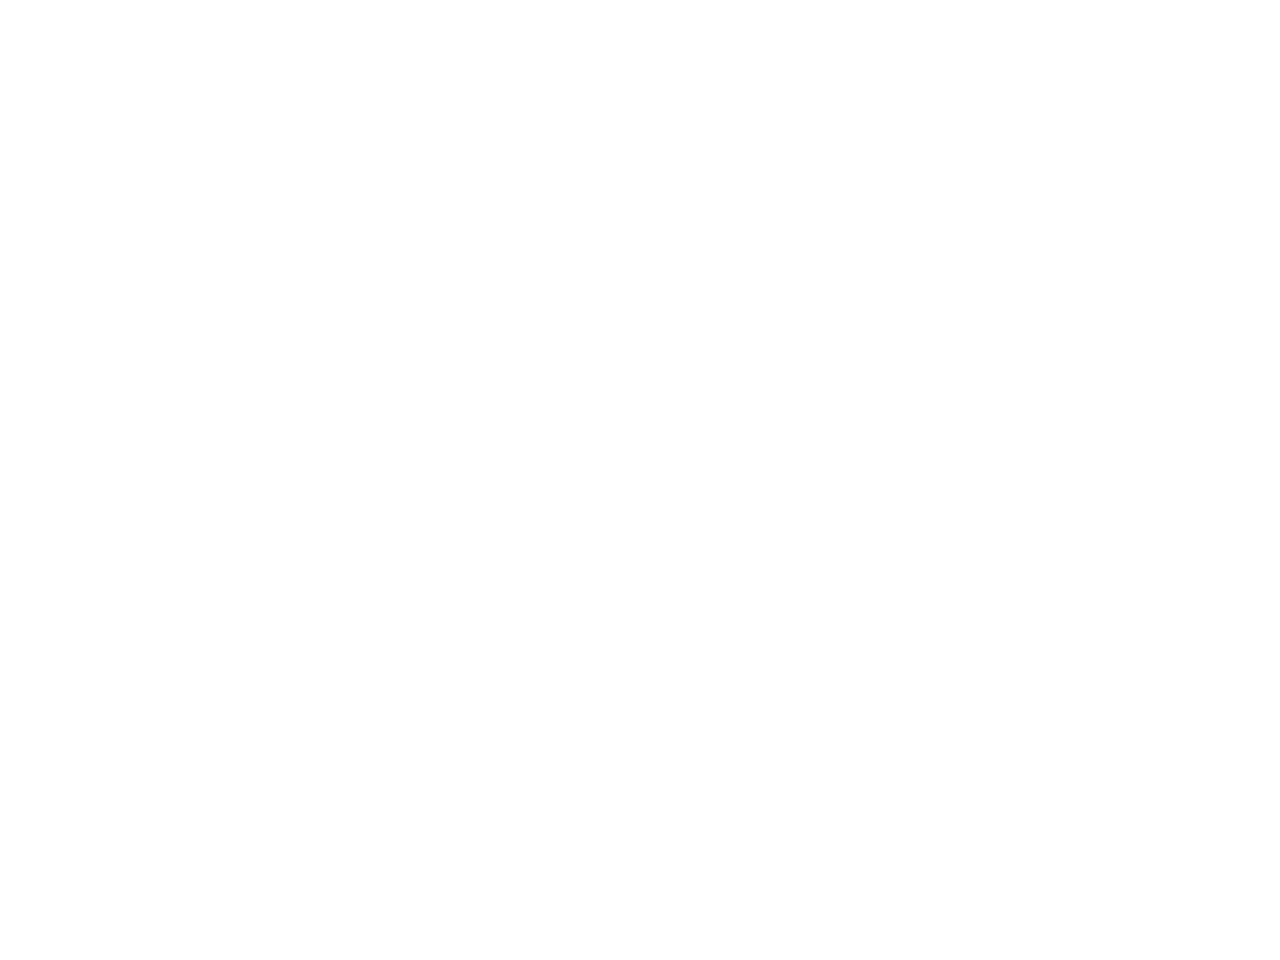

<IPython.core.display.Javascript object>


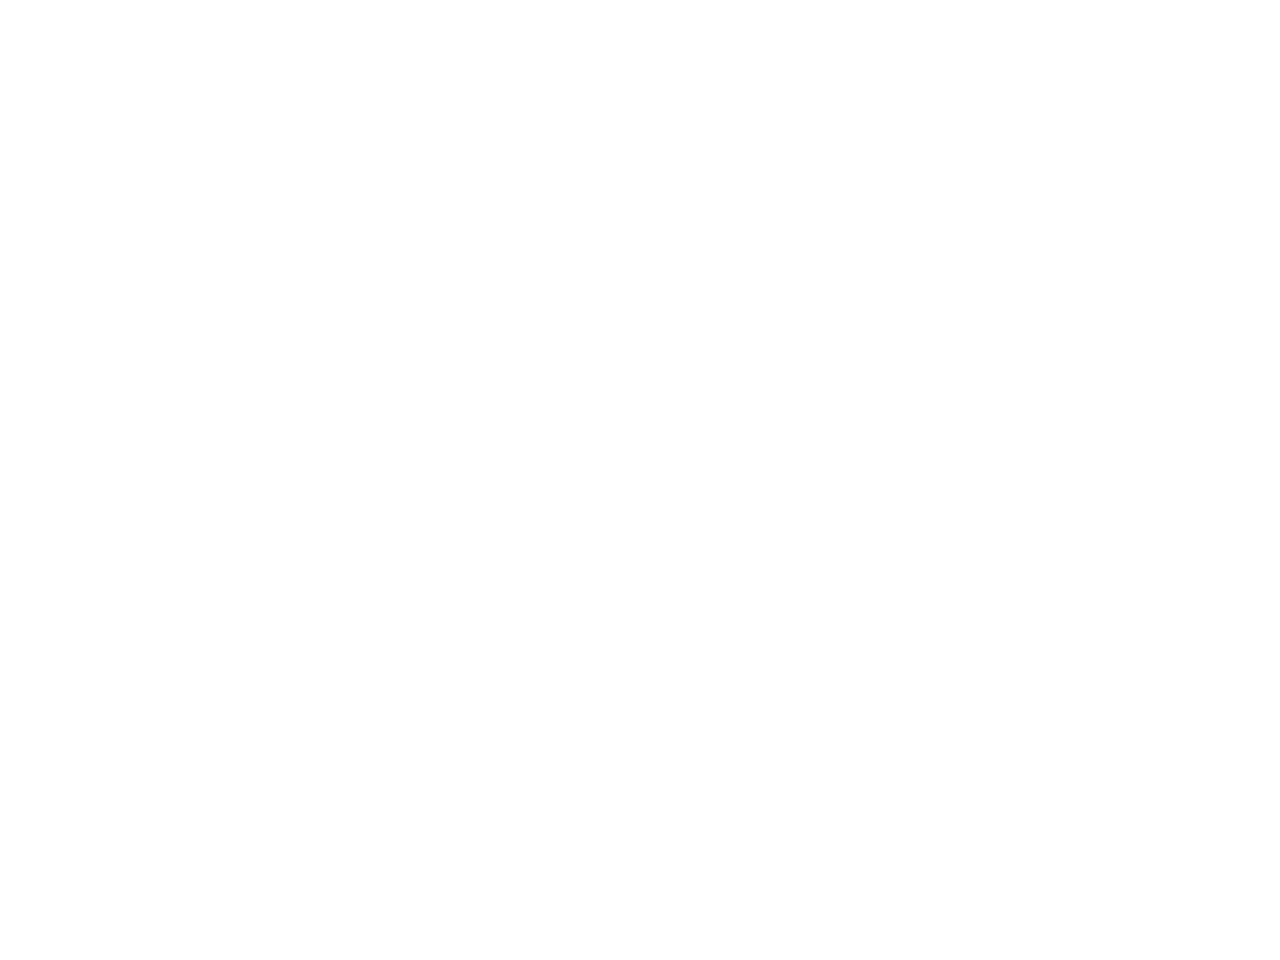

<IPython.core.display.Javascript object>


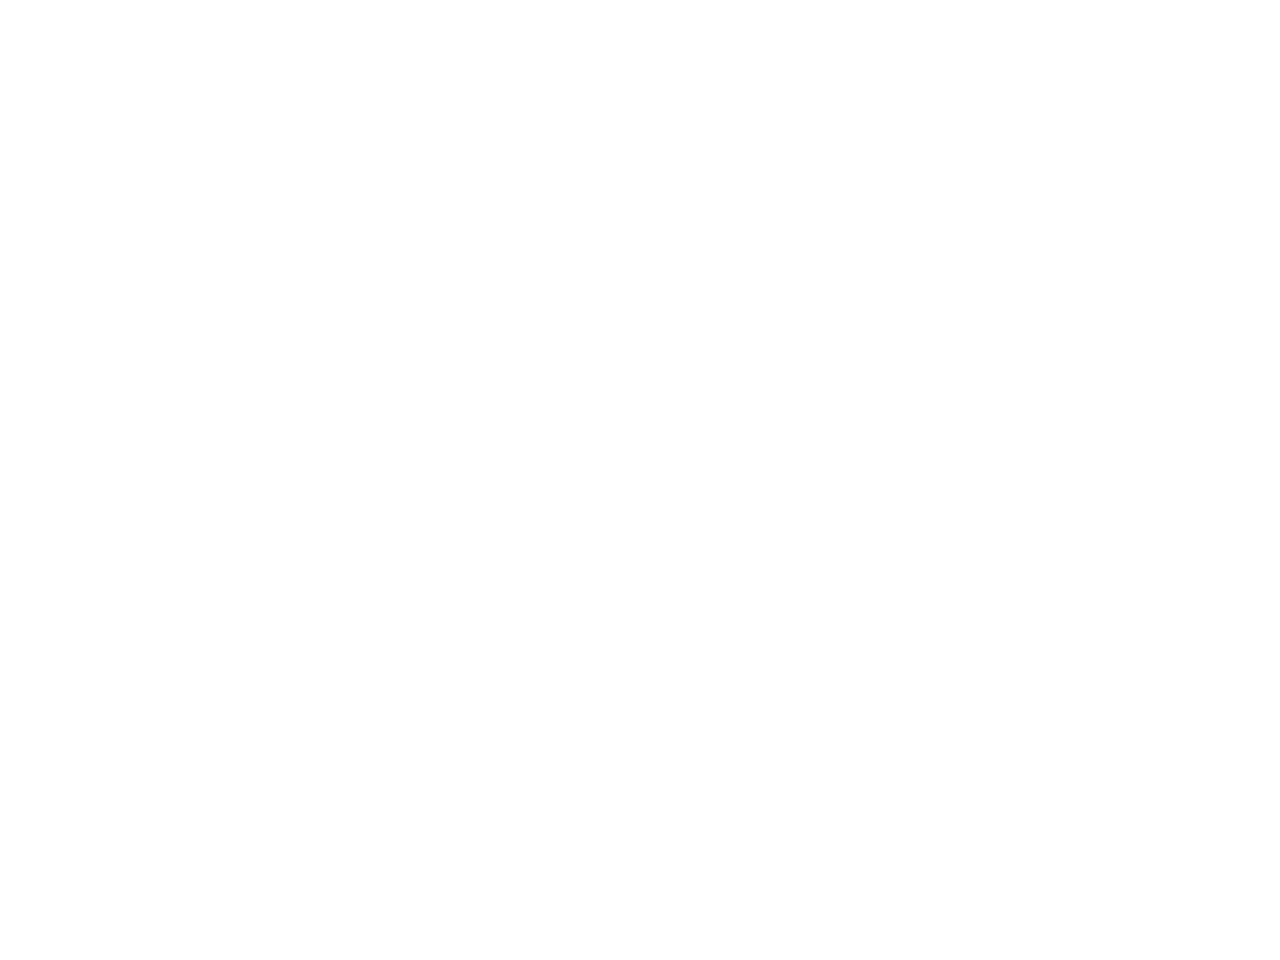

<IPython.core.display.Javascript object>


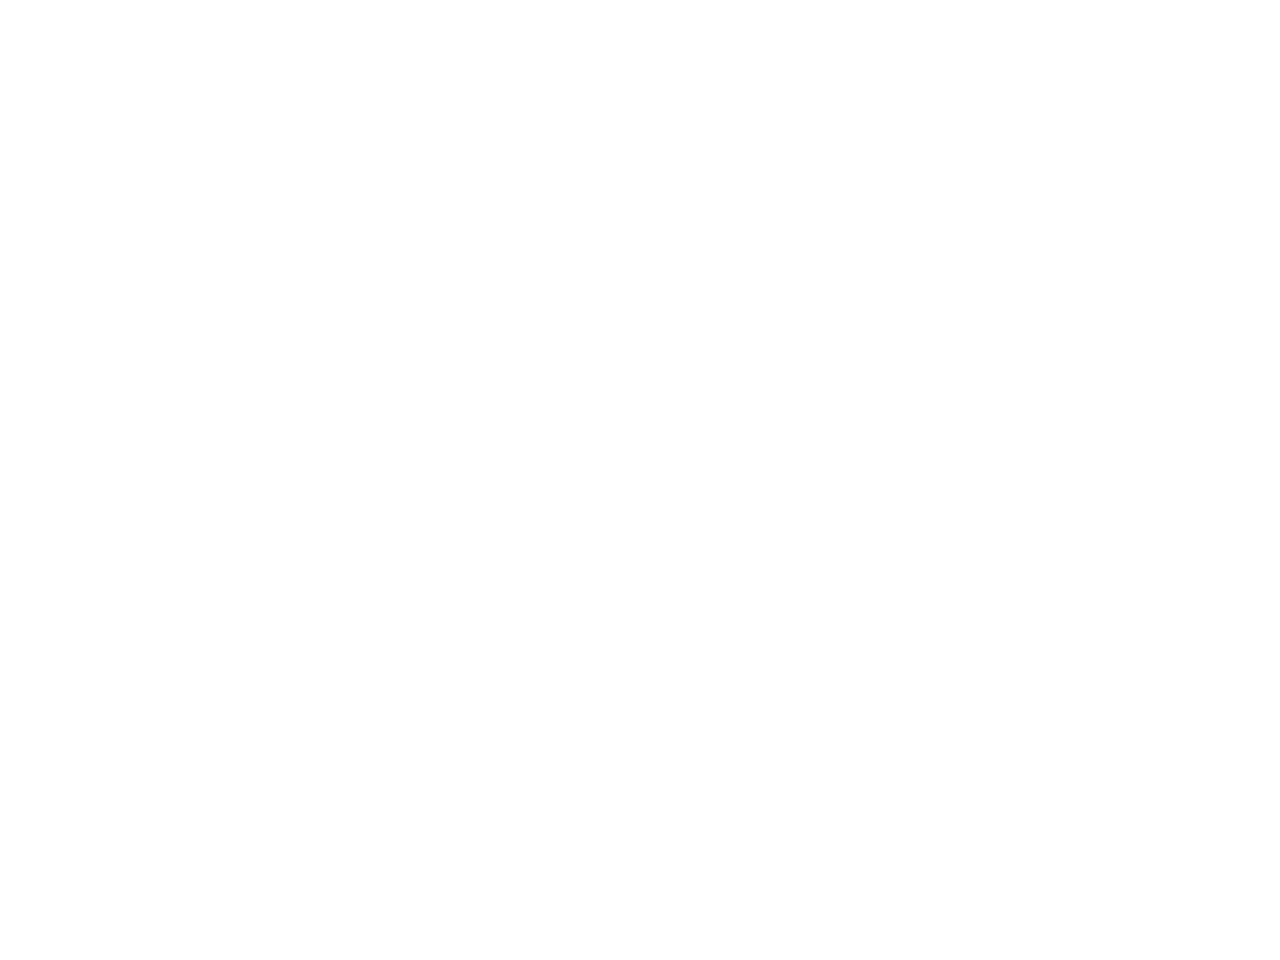

<IPython.core.display.Javascript object>


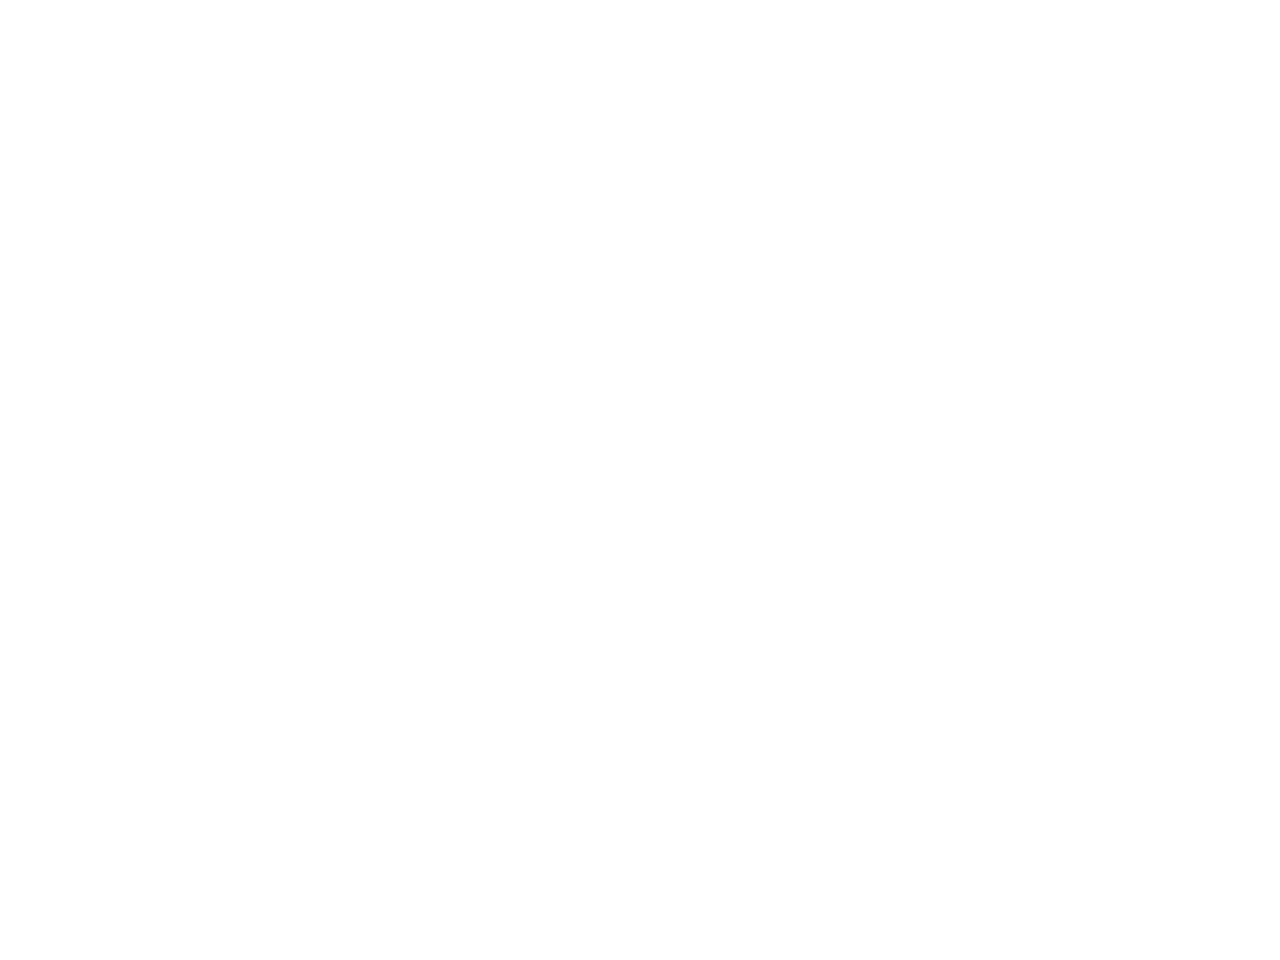

<IPython.core.display.Javascript object>


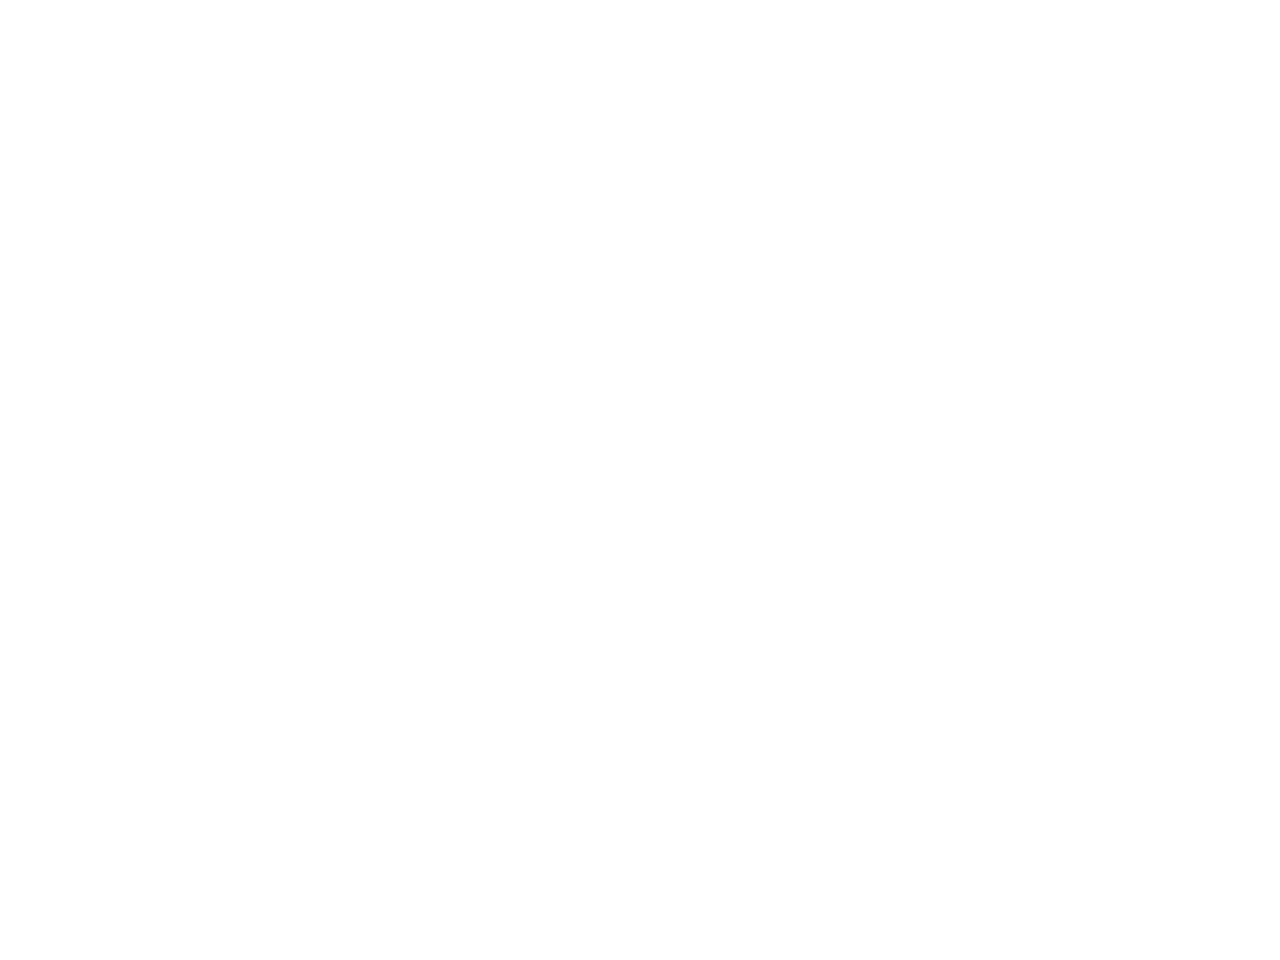

<IPython.core.display.Javascript object>


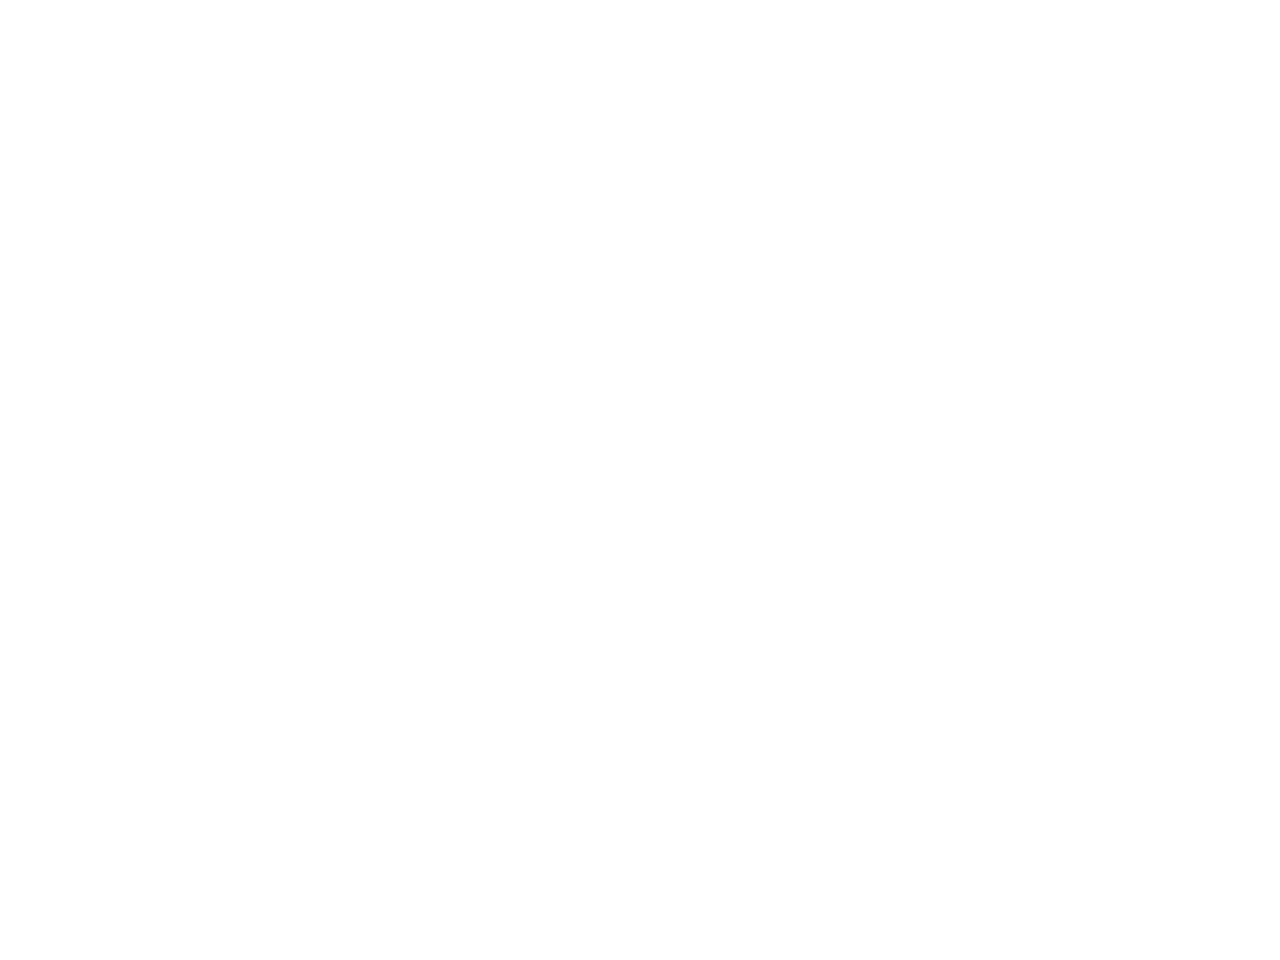

<IPython.core.display.Javascript object>


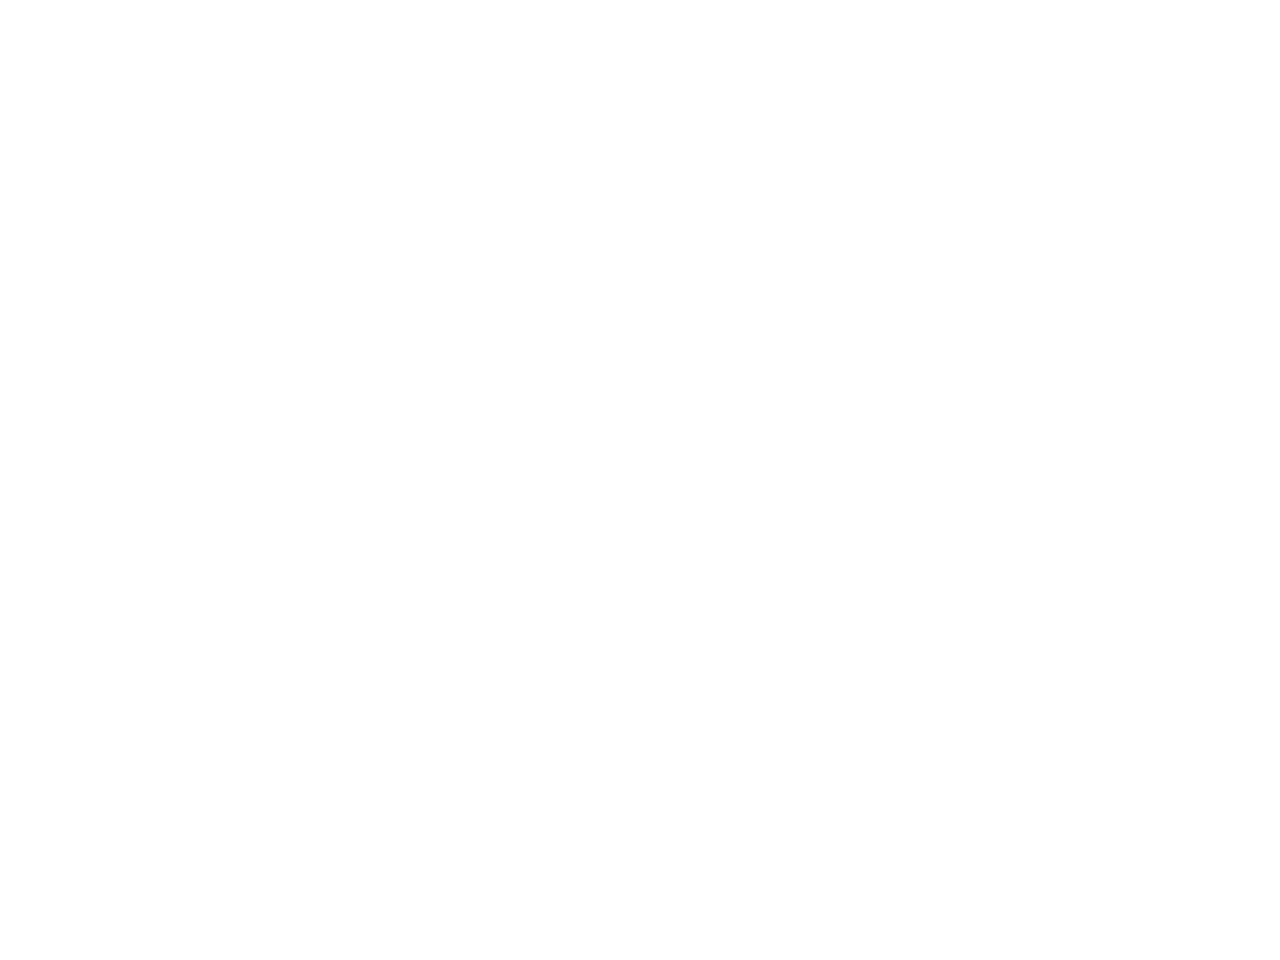

<IPython.core.display.Javascript object>


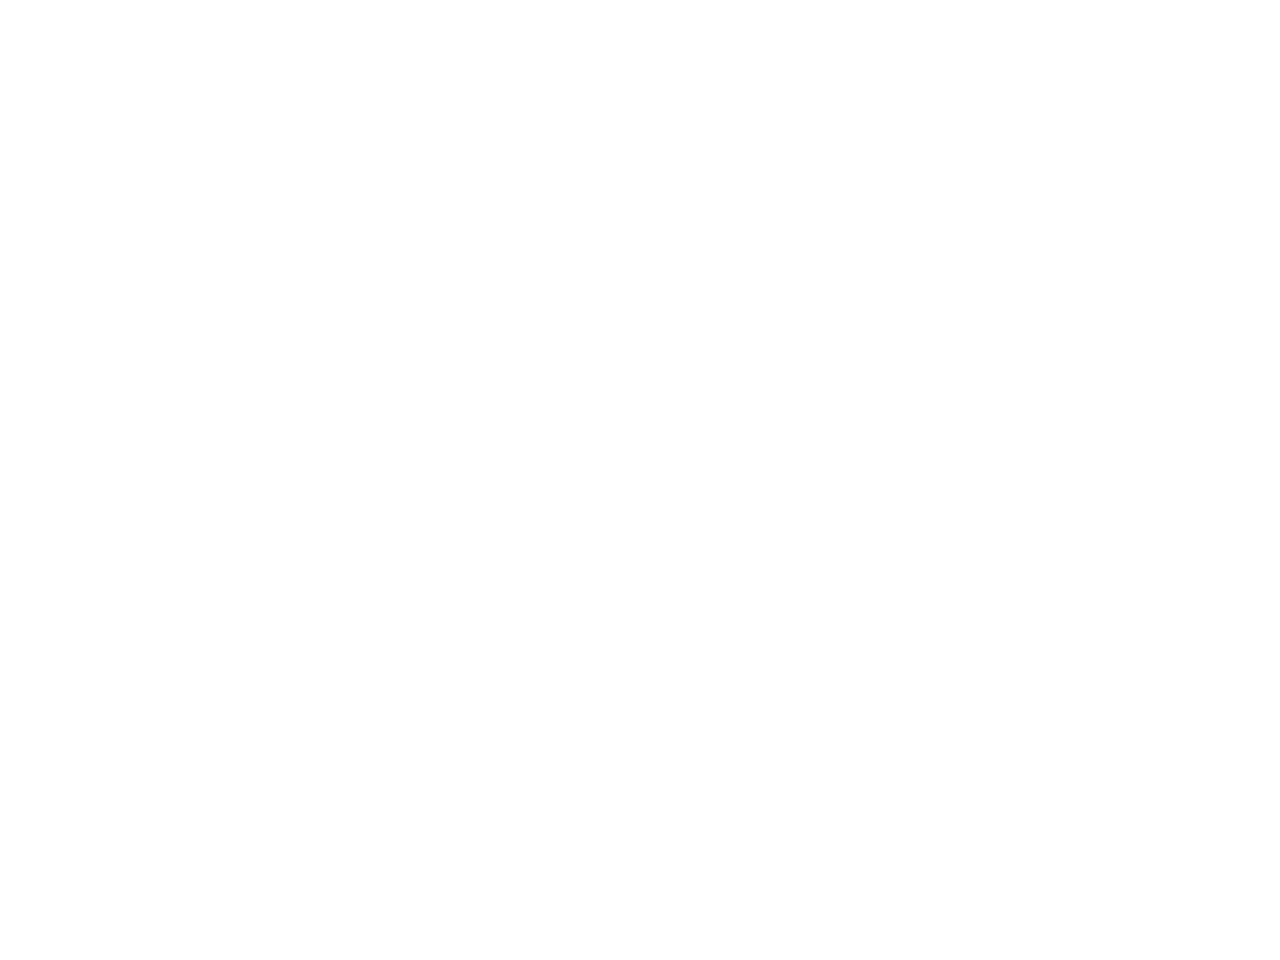

<IPython.core.display.Javascript object>


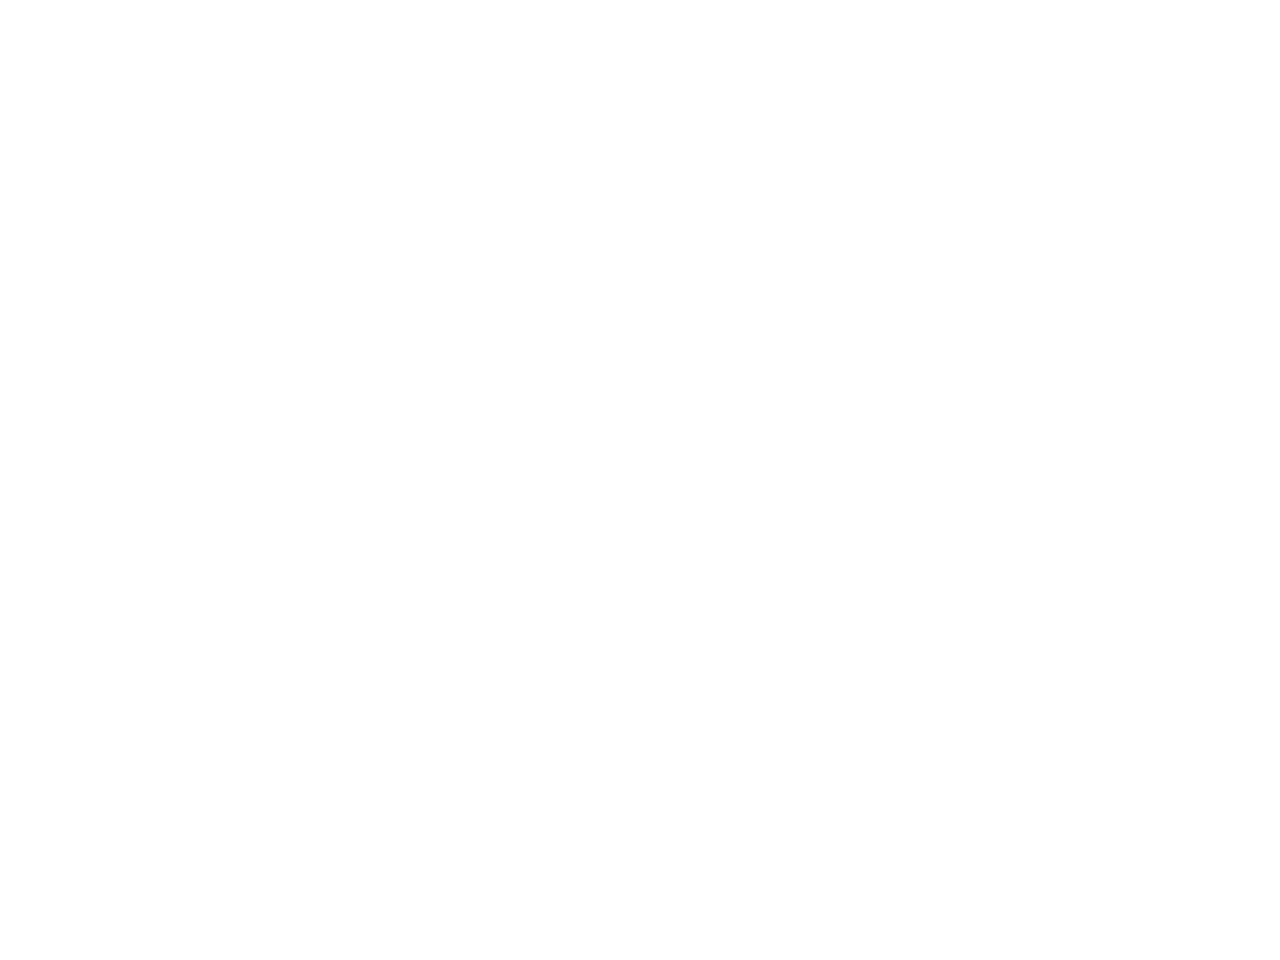

<IPython.core.display.Javascript object>


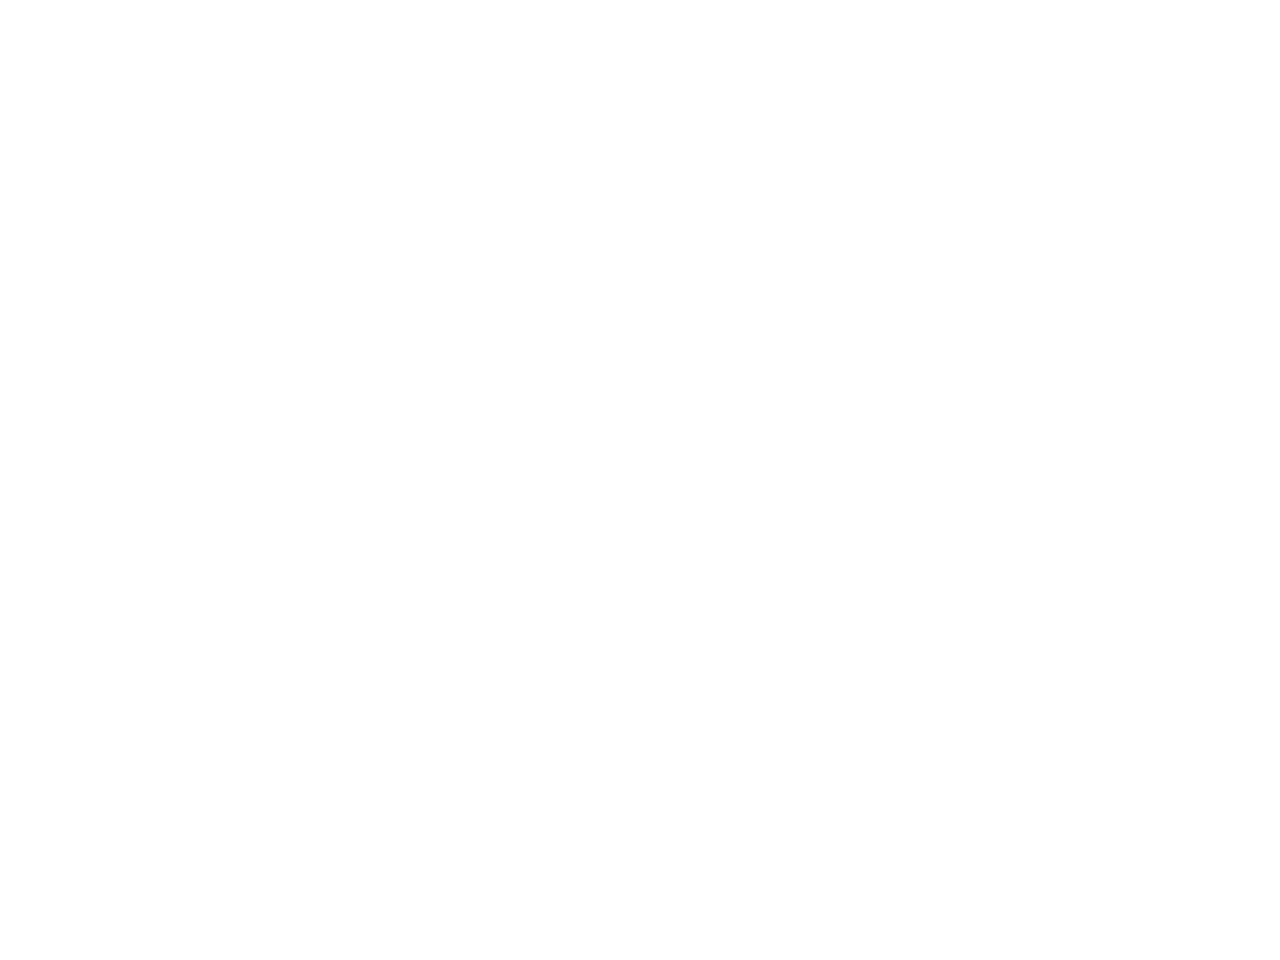

<IPython.core.display.Javascript object>


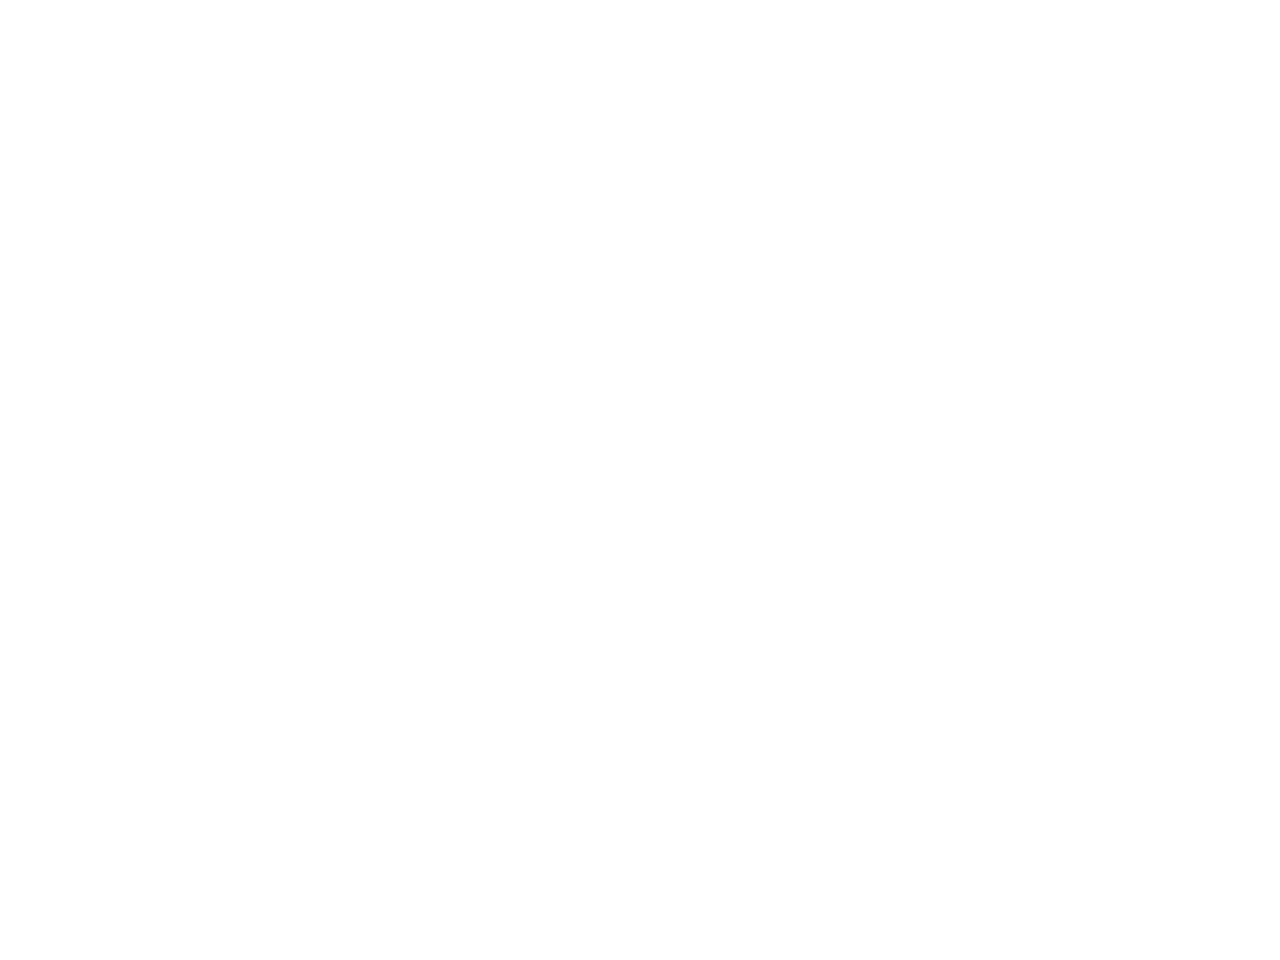

<IPython.core.display.Javascript object>


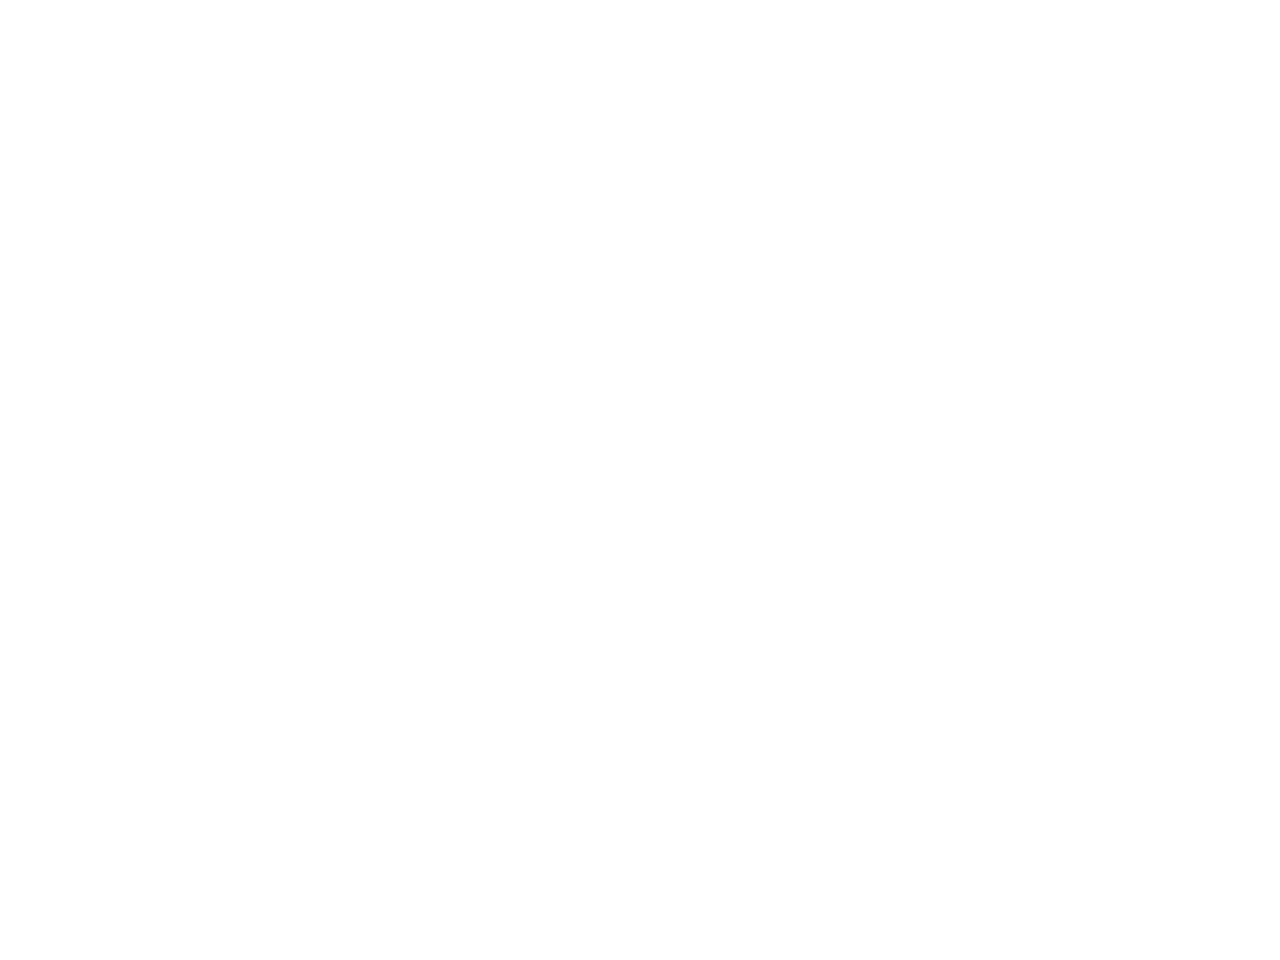

<IPython.core.display.Javascript object>


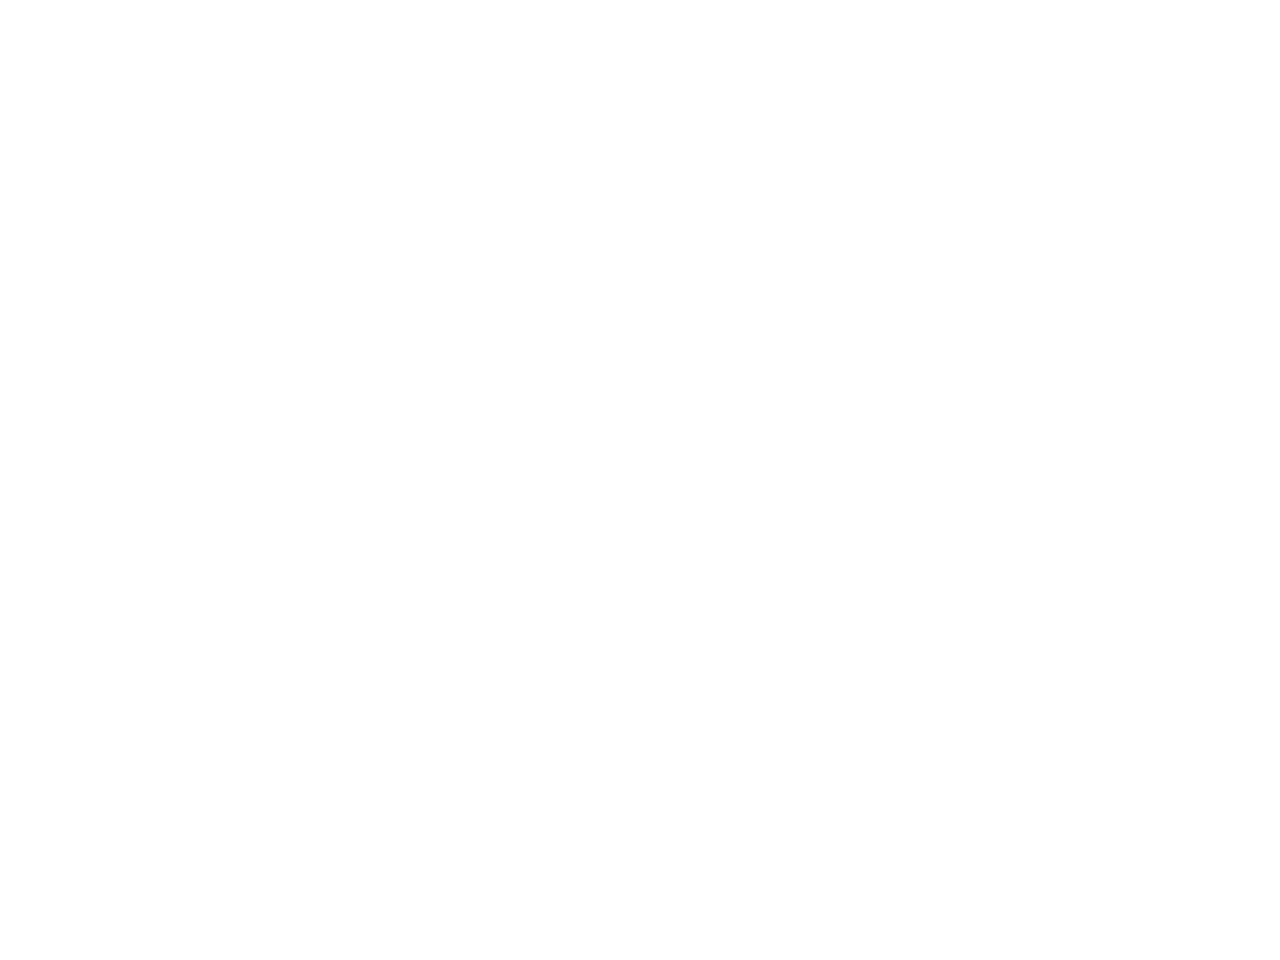

<IPython.core.display.Javascript object>


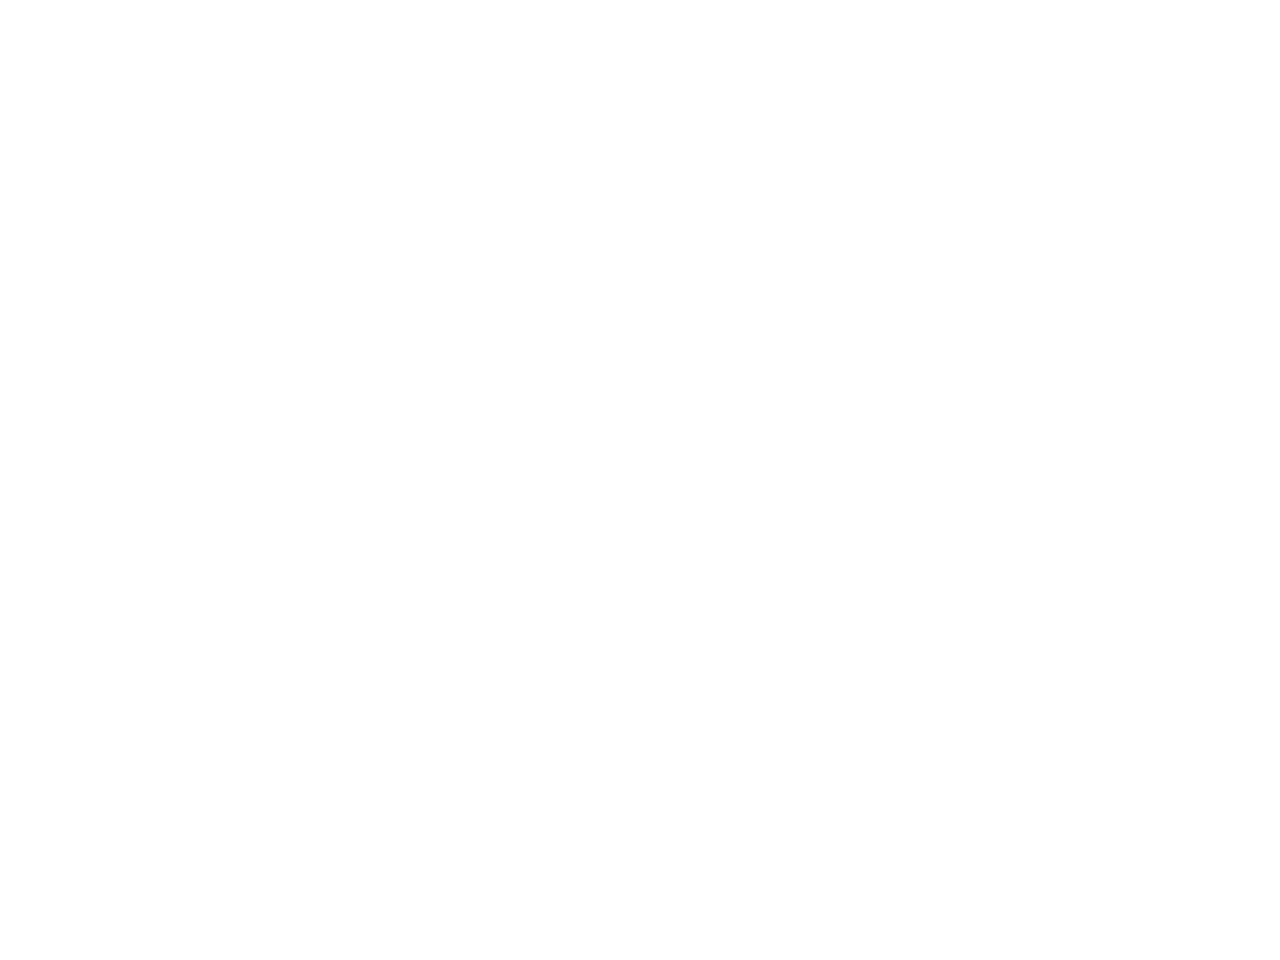

<IPython.core.display.Javascript object>


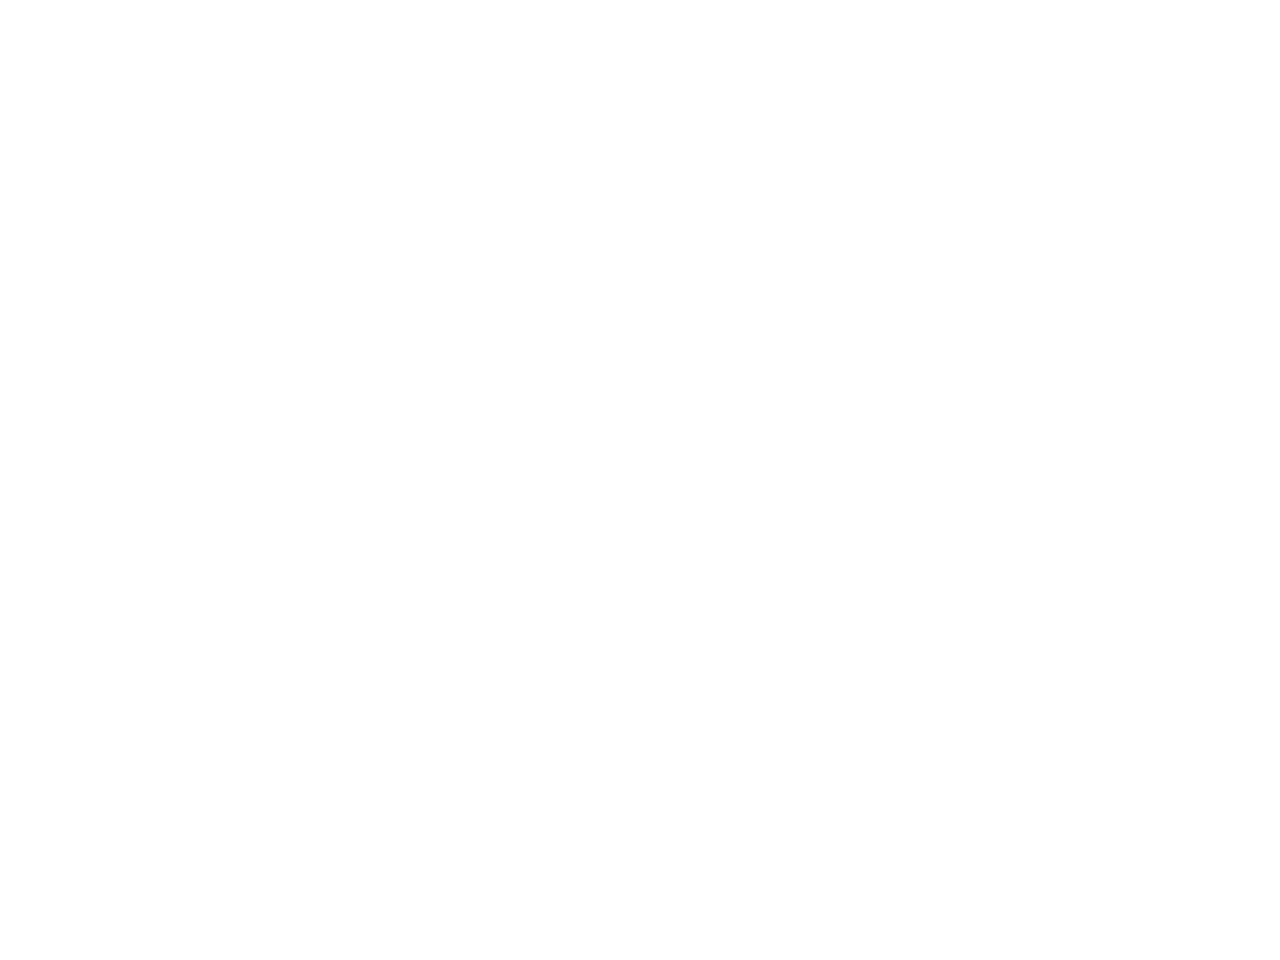

<IPython.core.display.Javascript object>


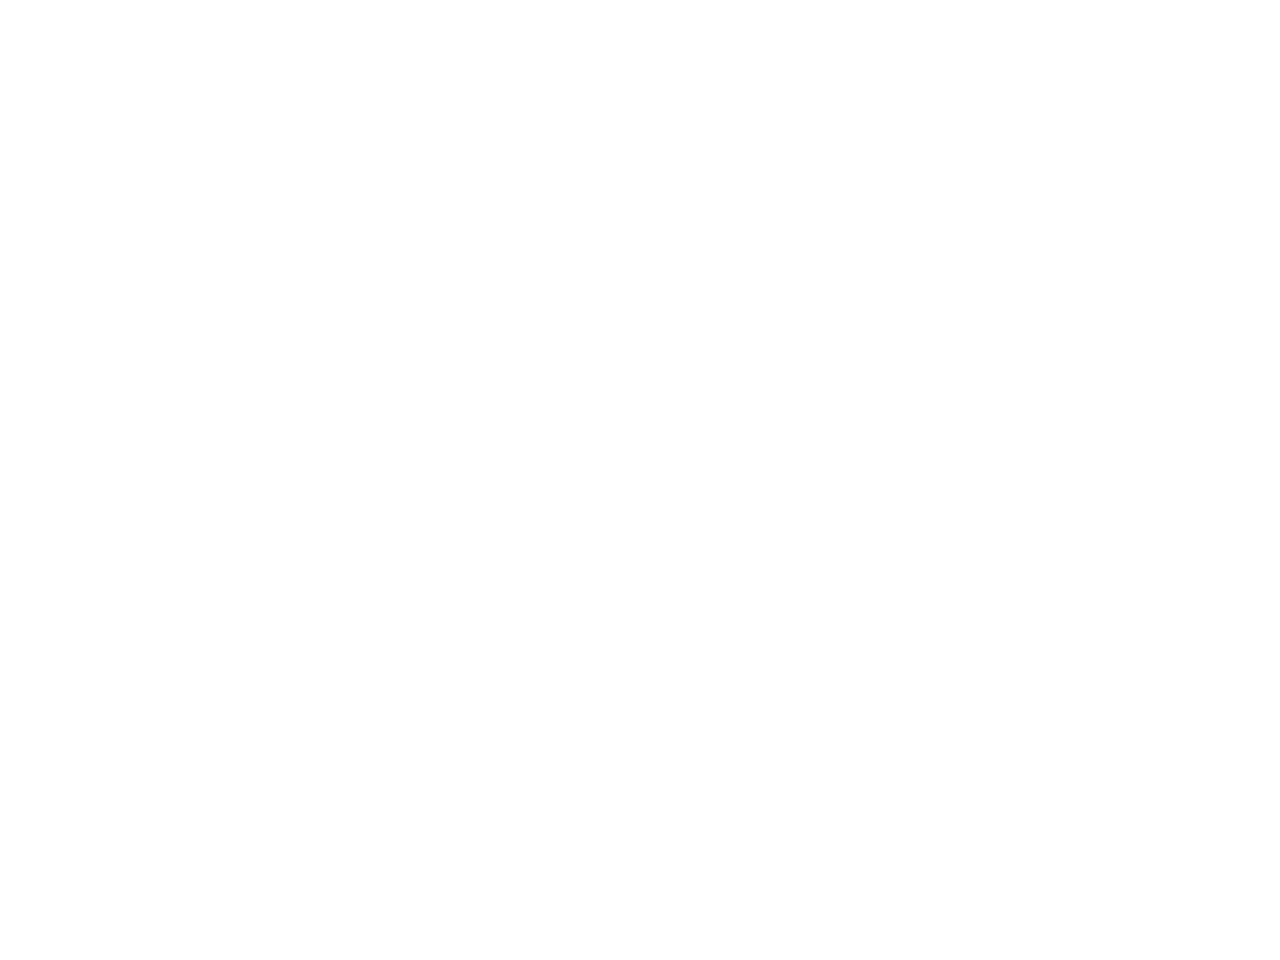

<IPython.core.display.Javascript object>


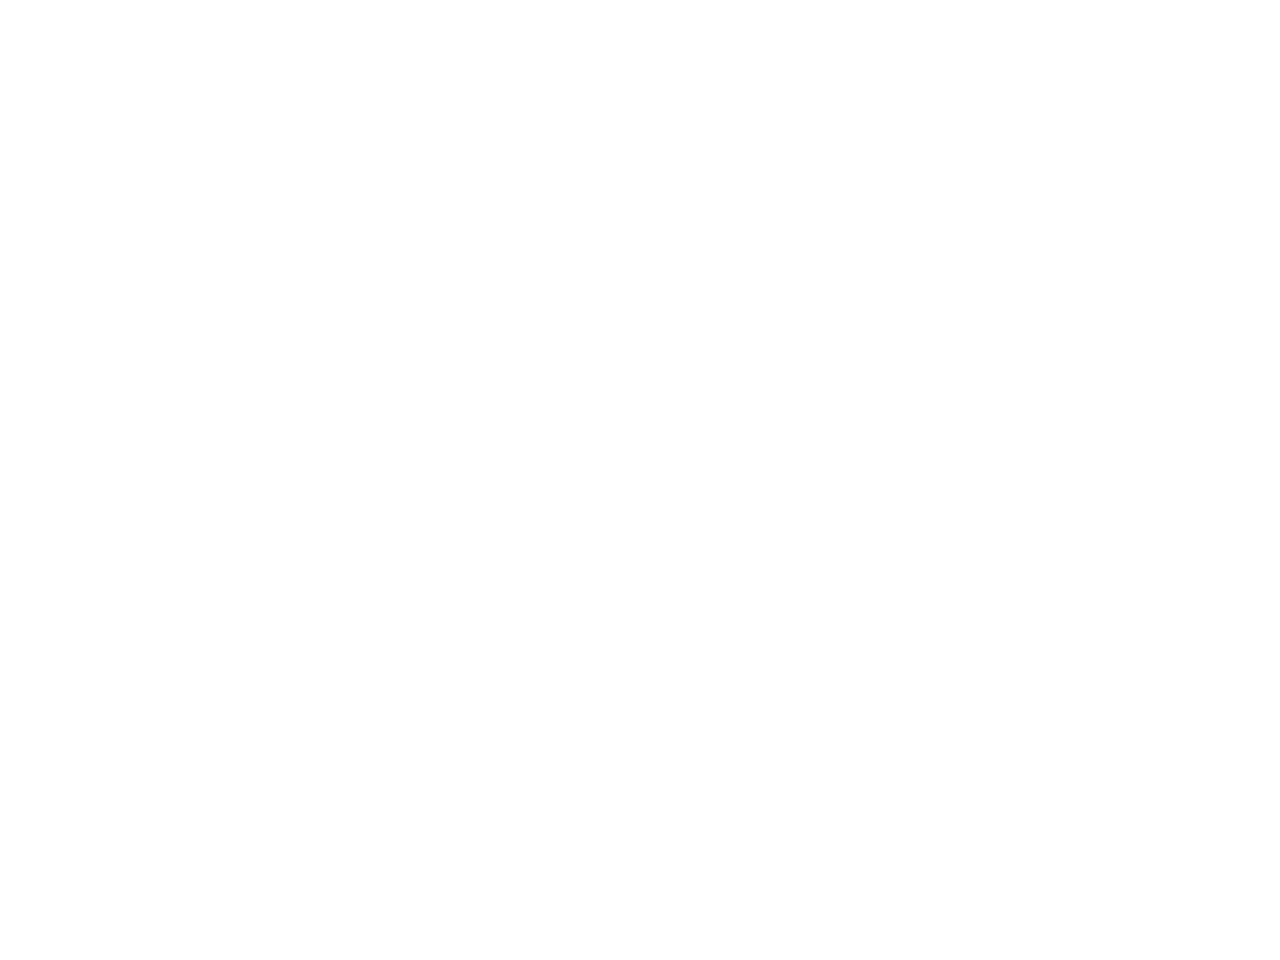

<IPython.core.display.Javascript object>


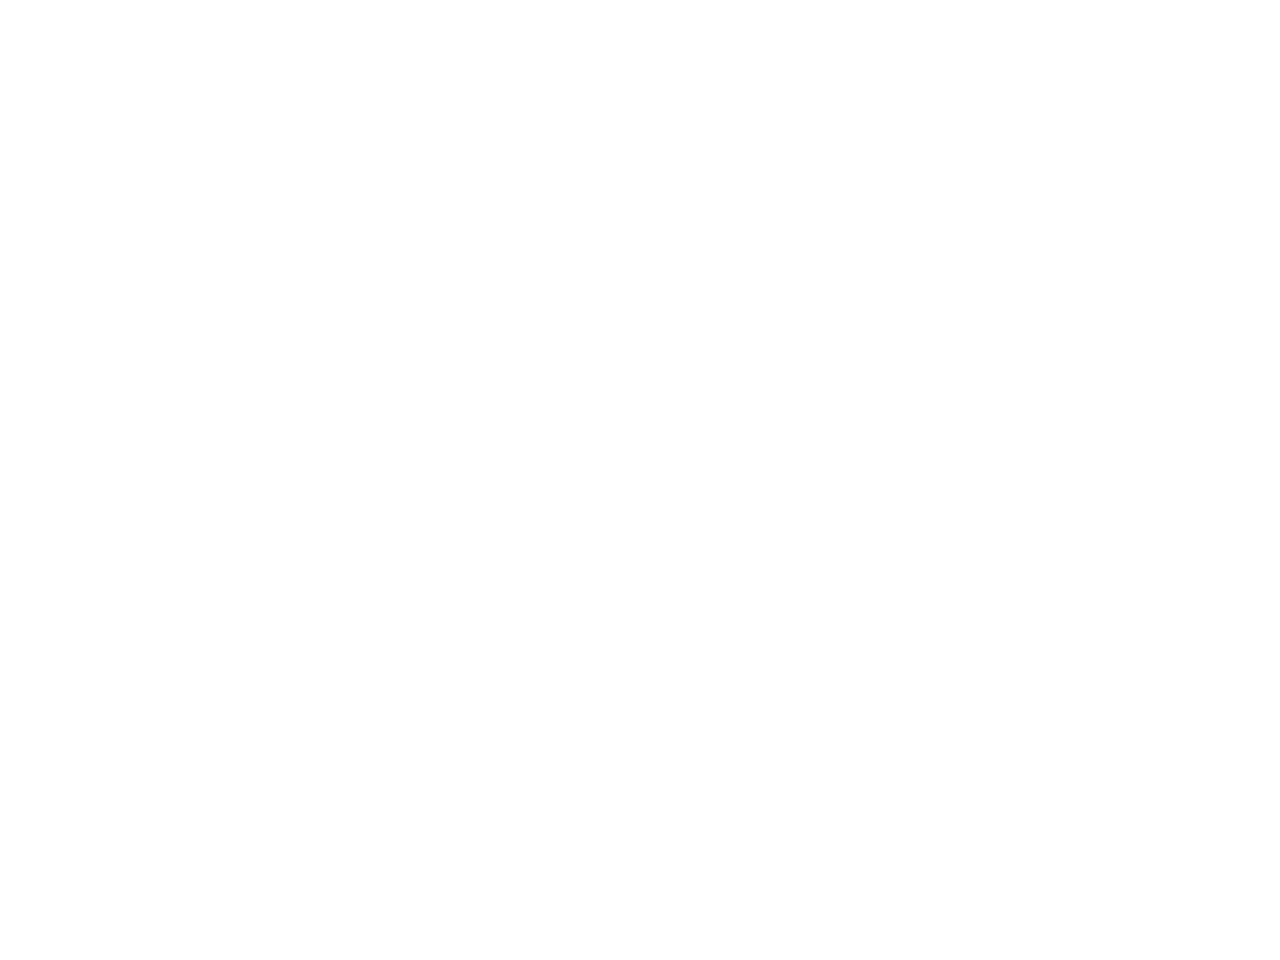

<IPython.core.display.Javascript object>


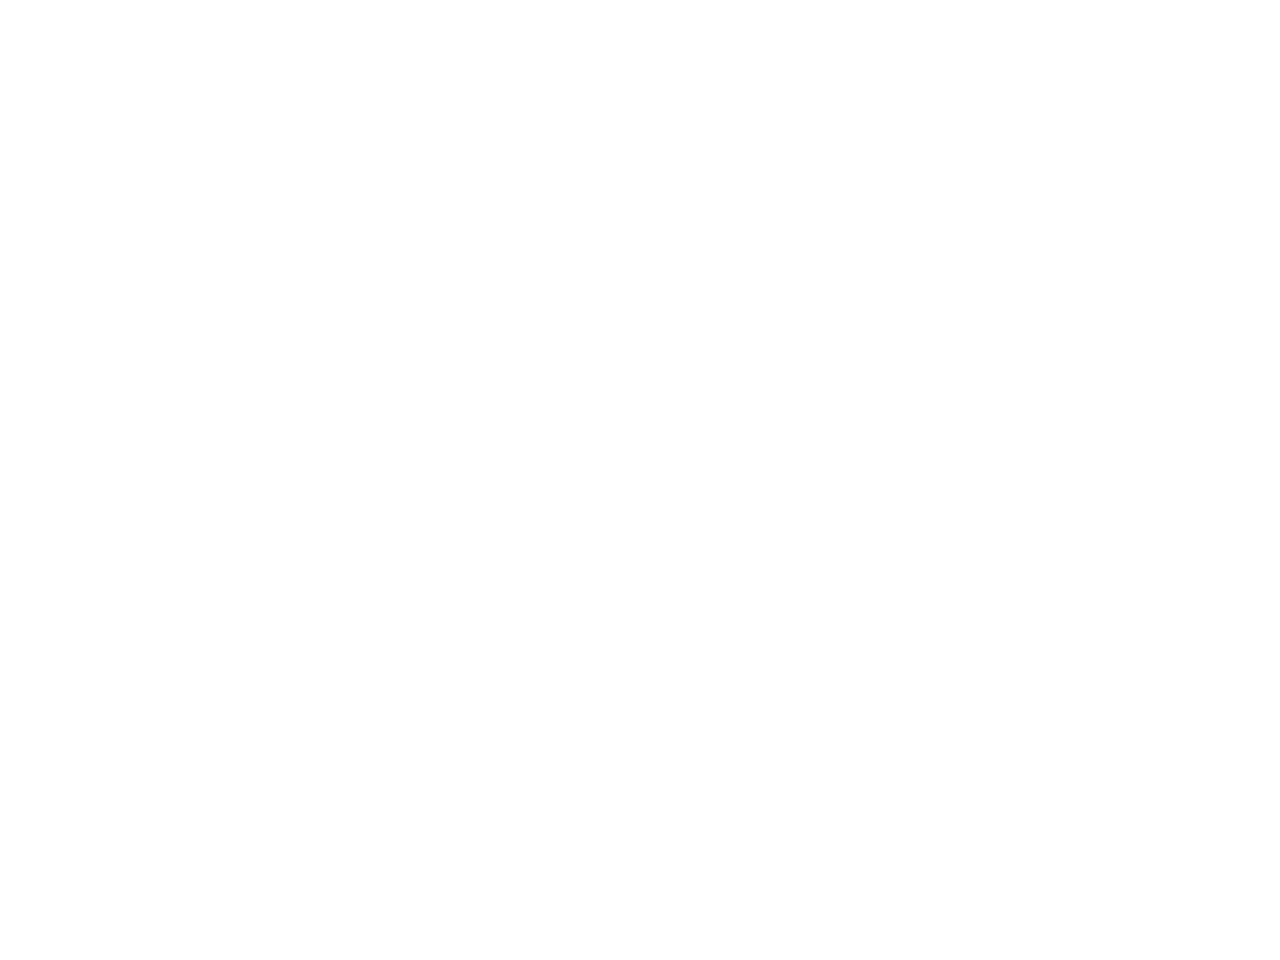

<IPython.core.display.Javascript object>


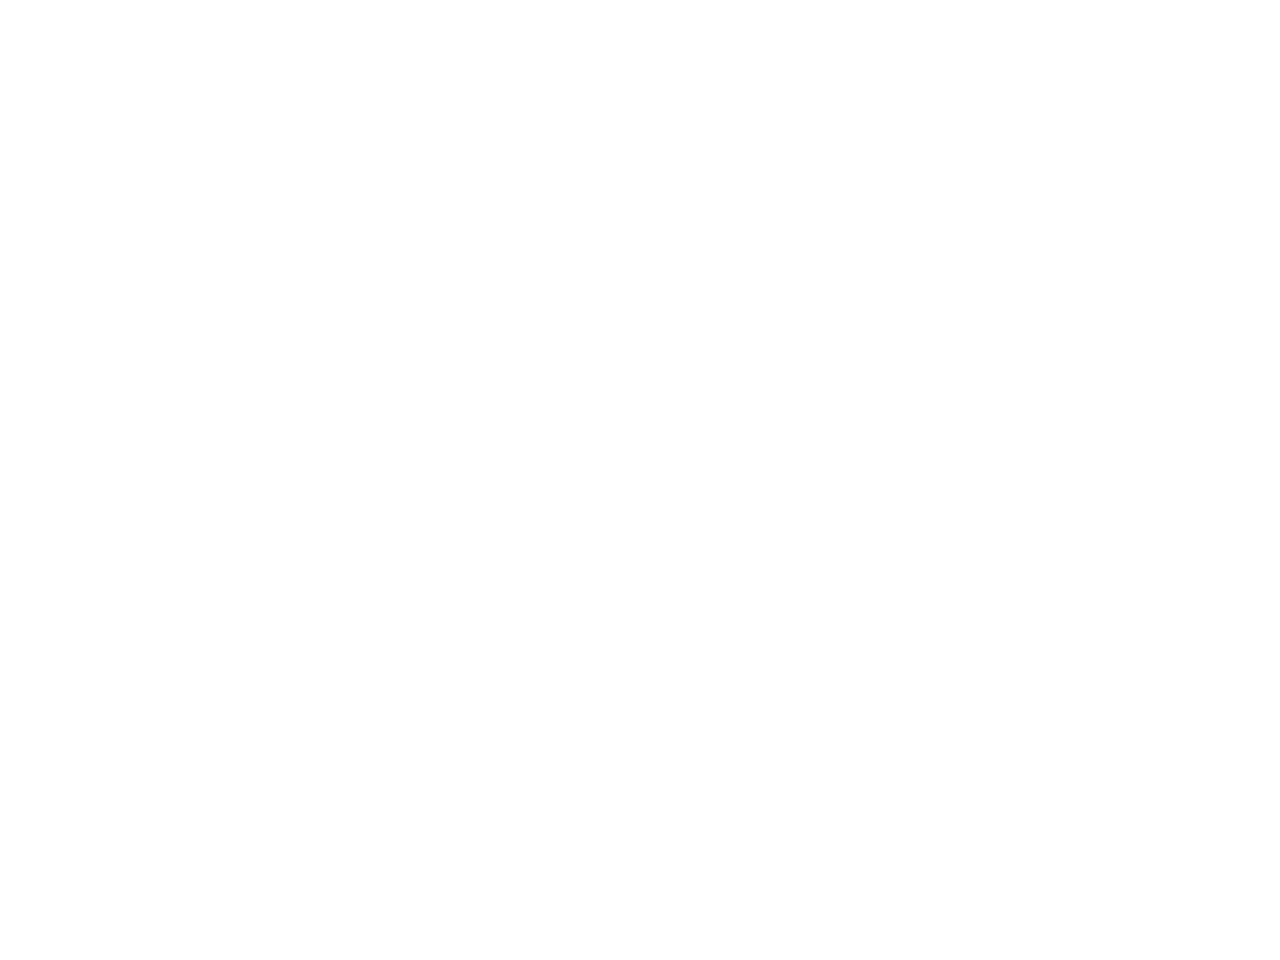

<IPython.core.display.Javascript object>


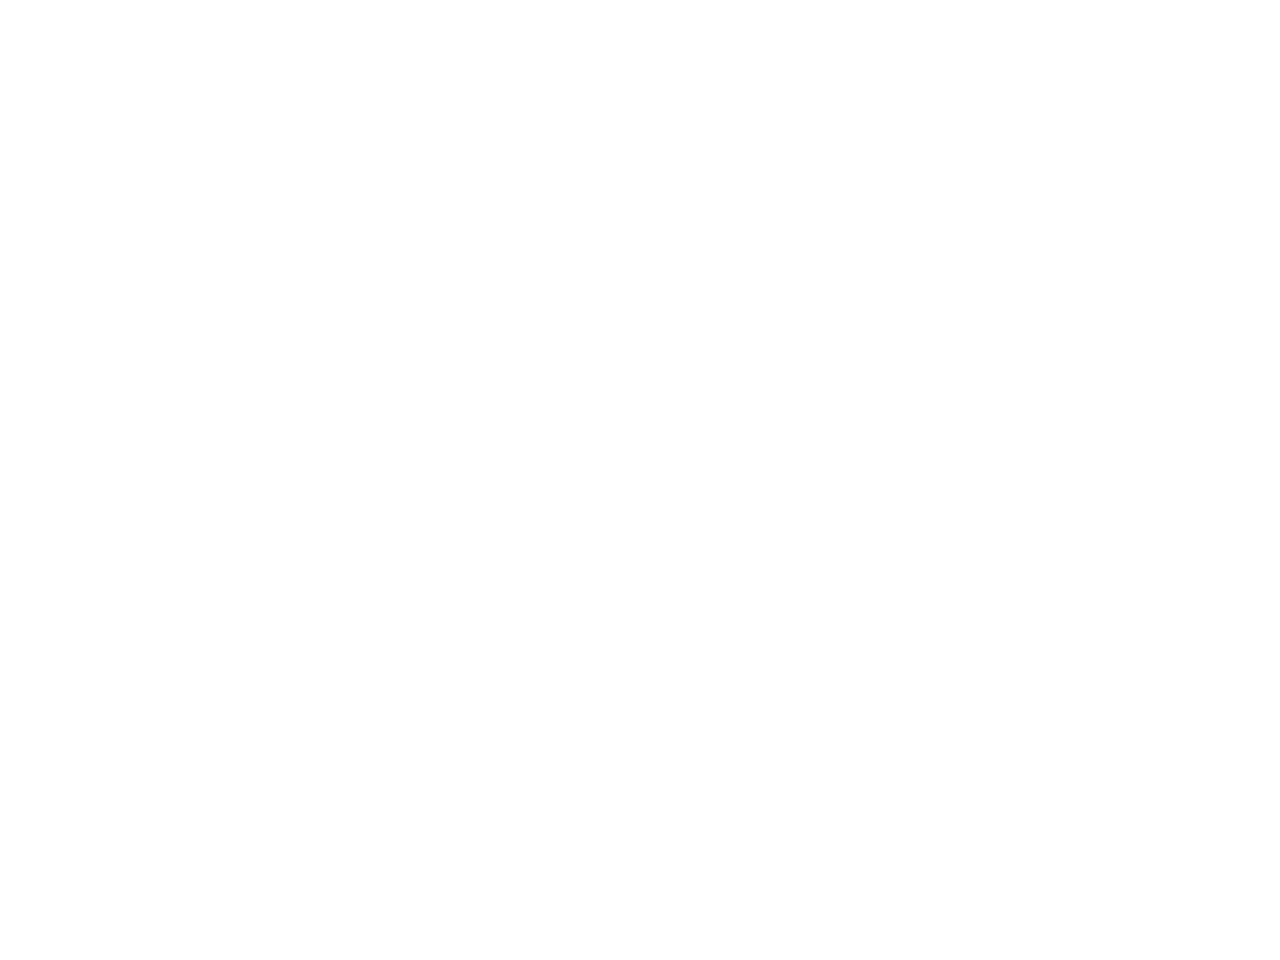

<IPython.core.display.Javascript object>


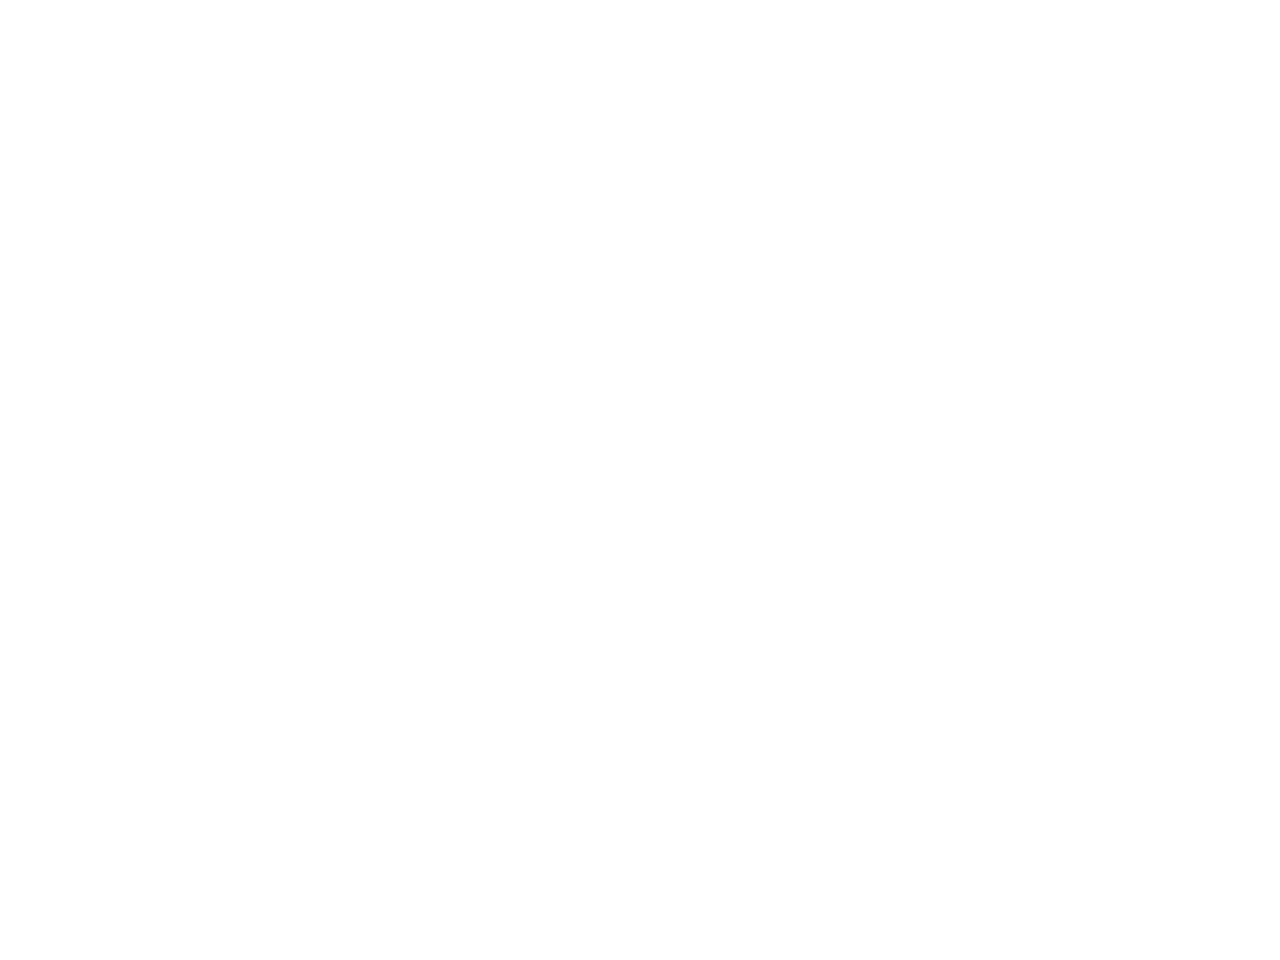

<IPython.core.display.Javascript object>


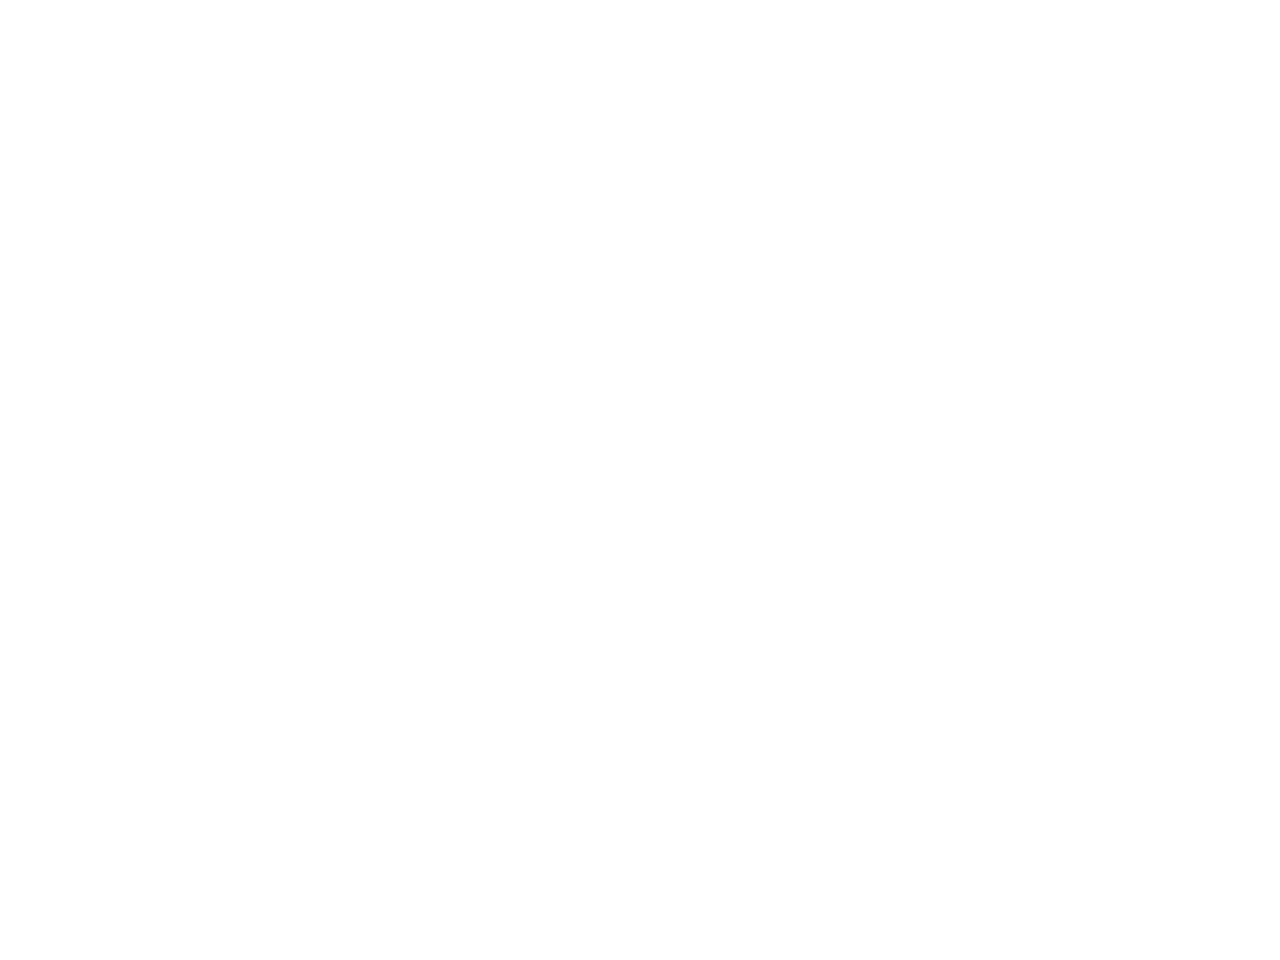

<IPython.core.display.Javascript object>


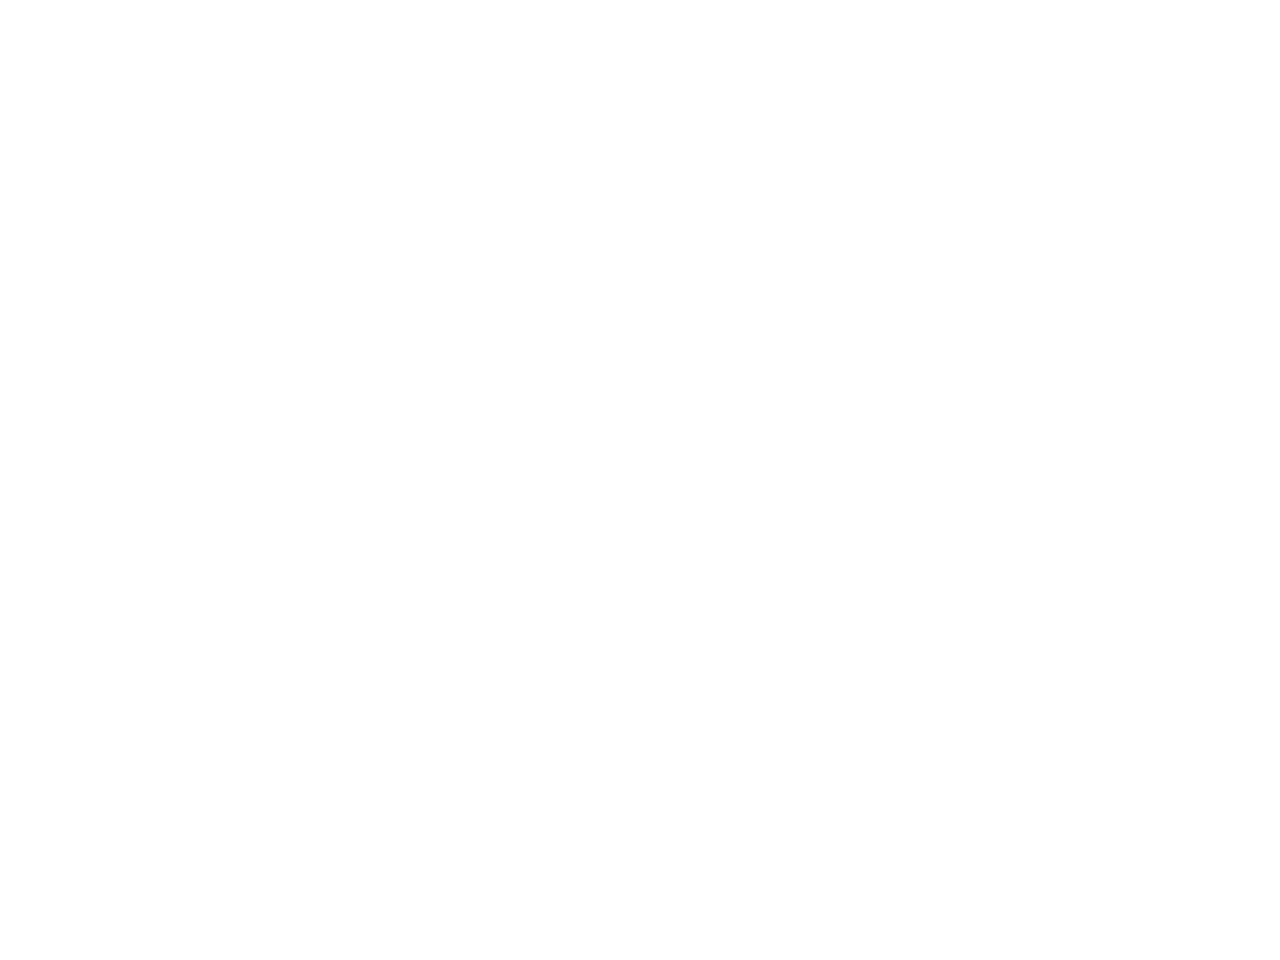

<IPython.core.display.Javascript object>


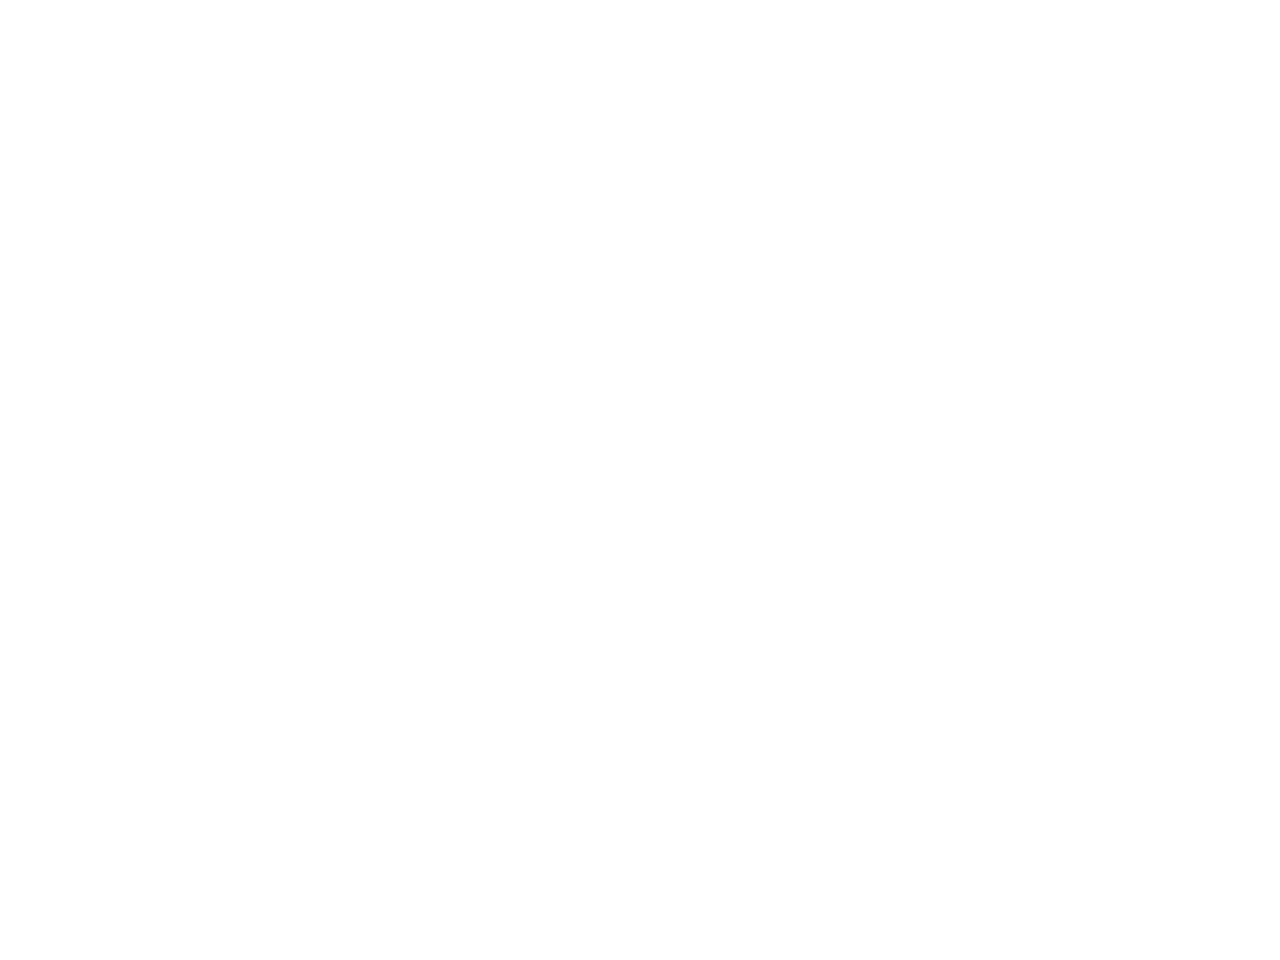

<IPython.core.display.Javascript object>


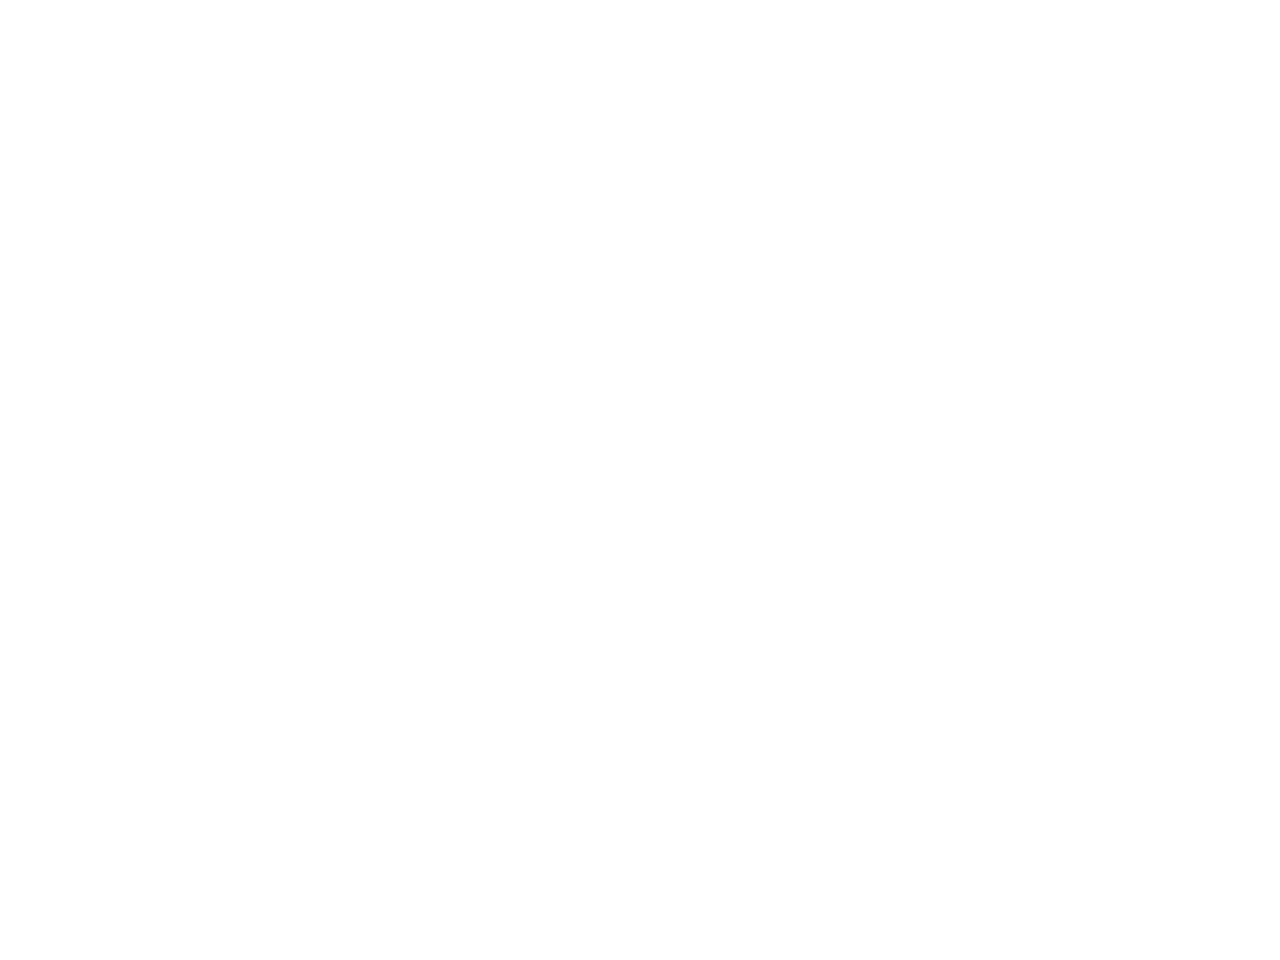

<IPython.core.display.Javascript object>


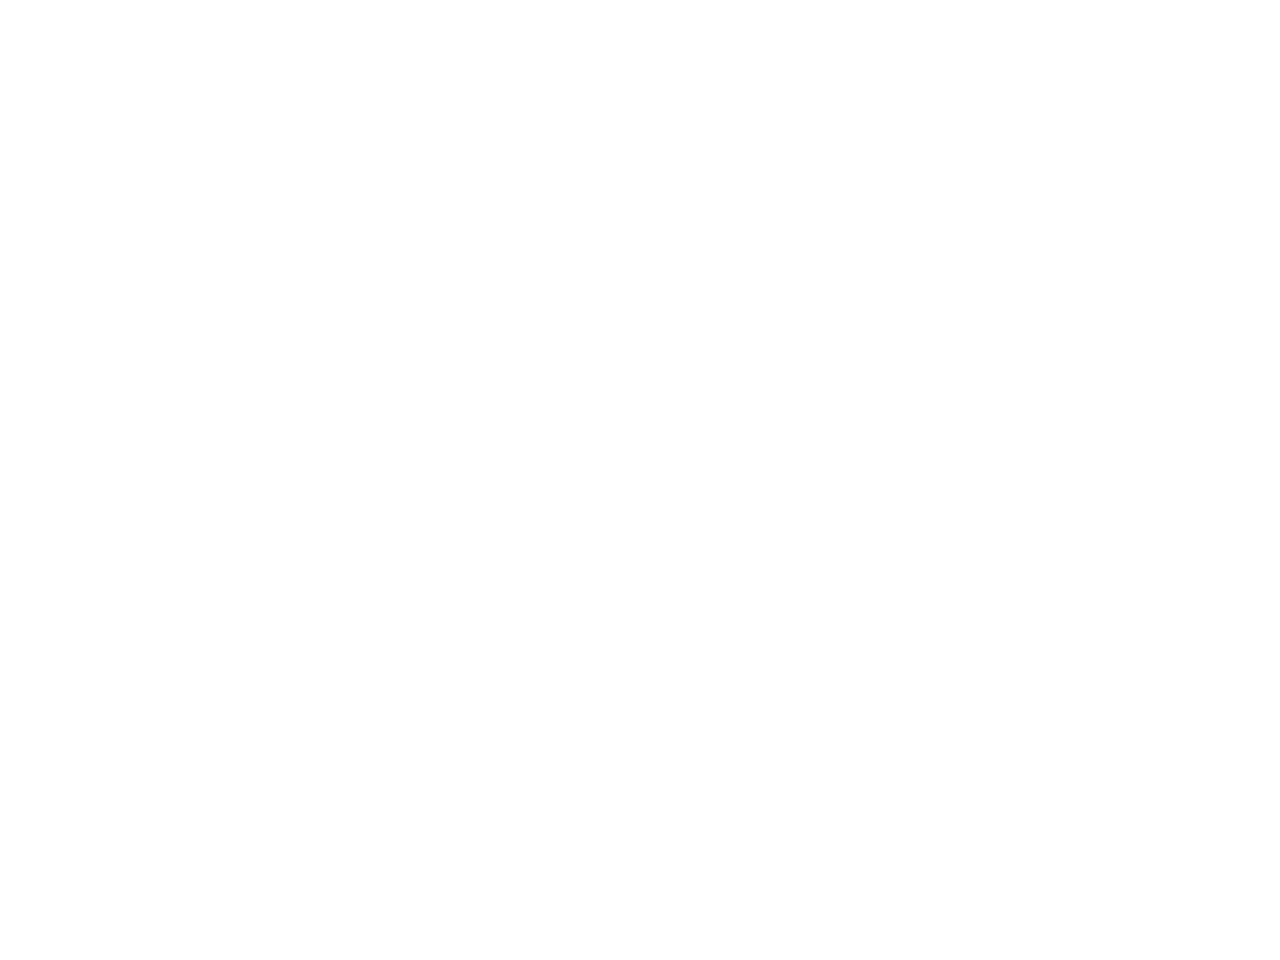

<IPython.core.display.Javascript object>


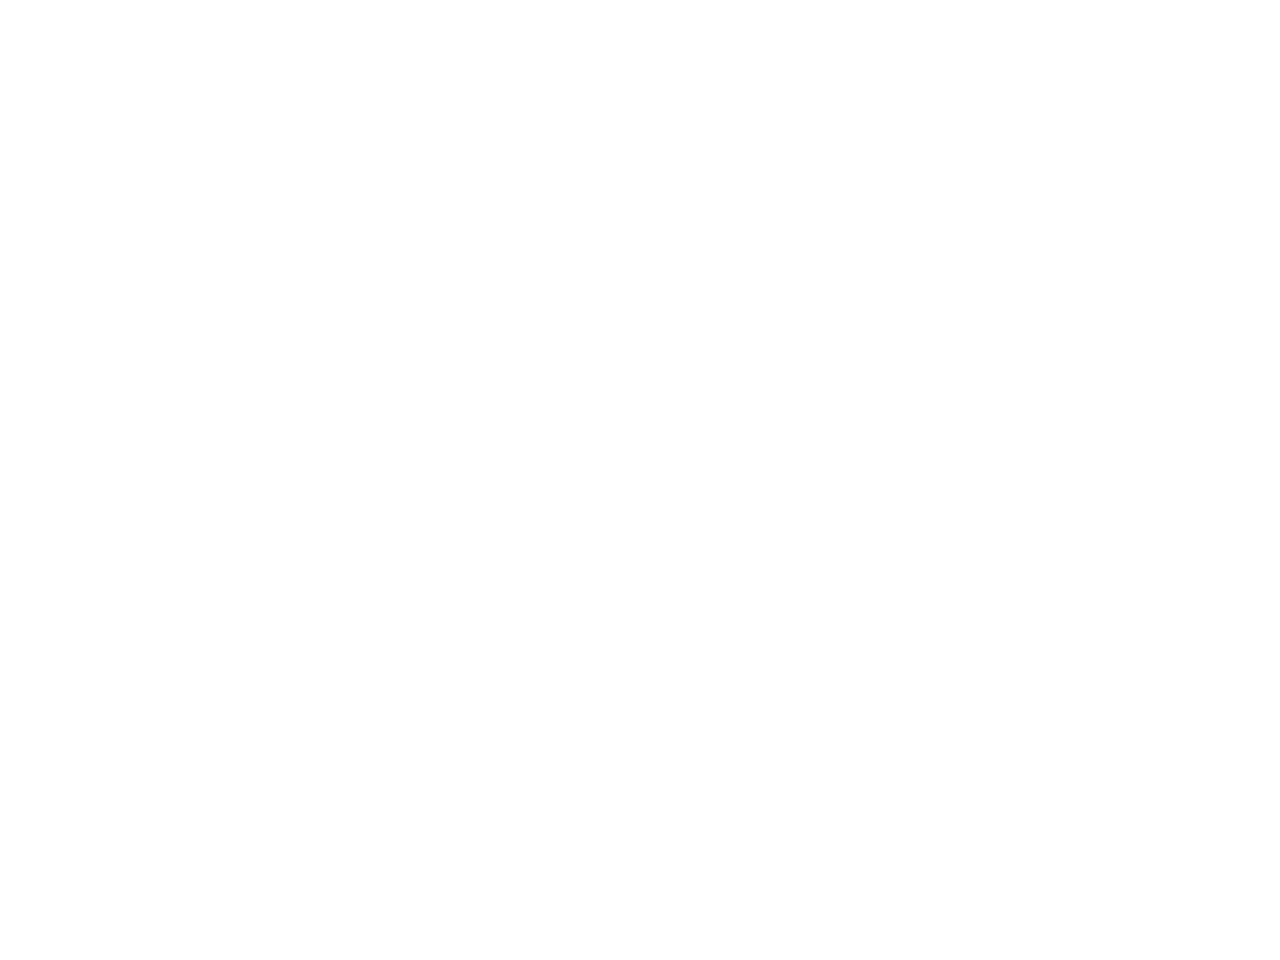

<IPython.core.display.Javascript object>


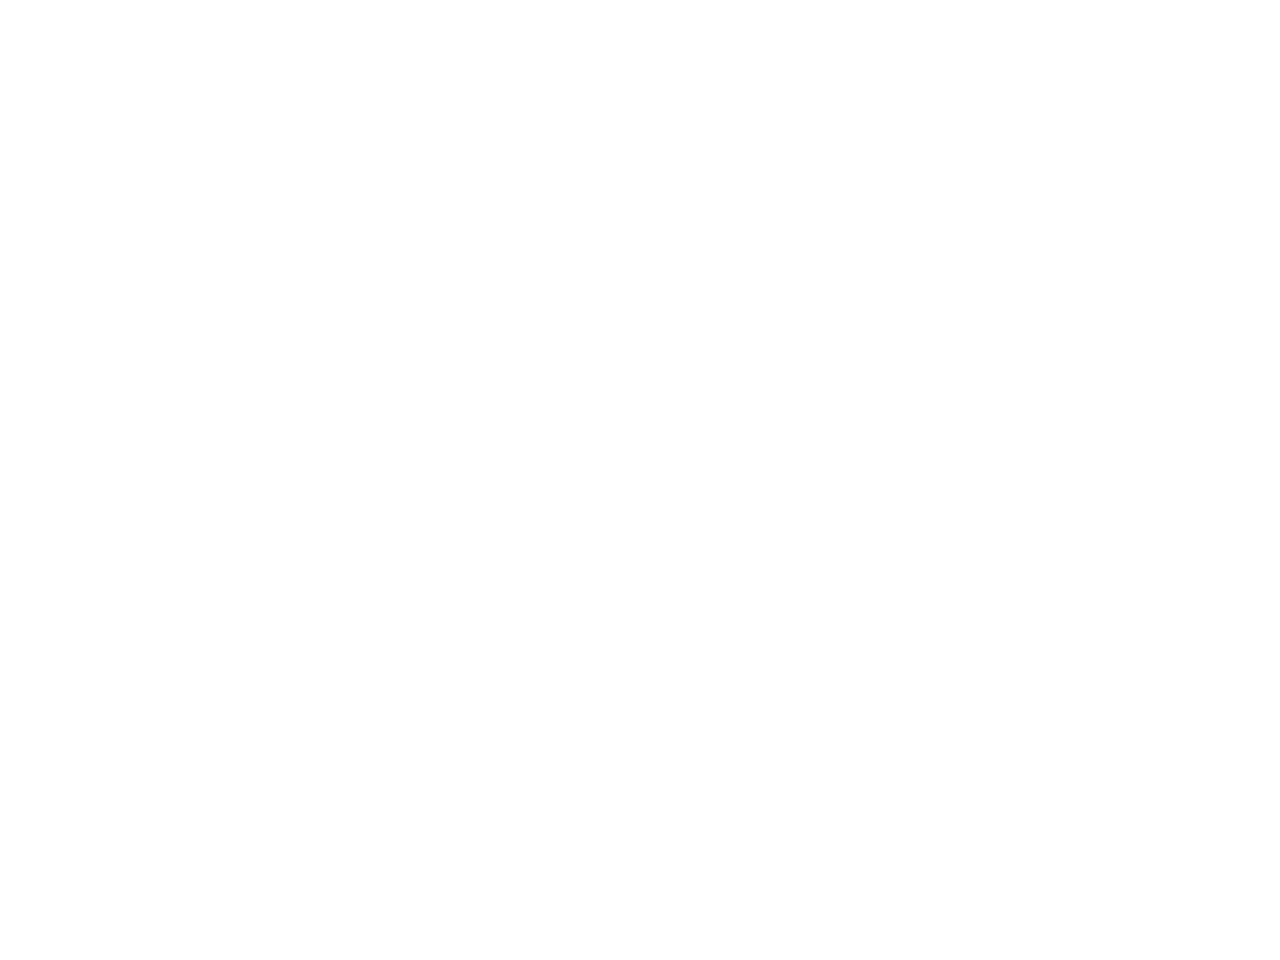

<IPython.core.display.Javascript object>


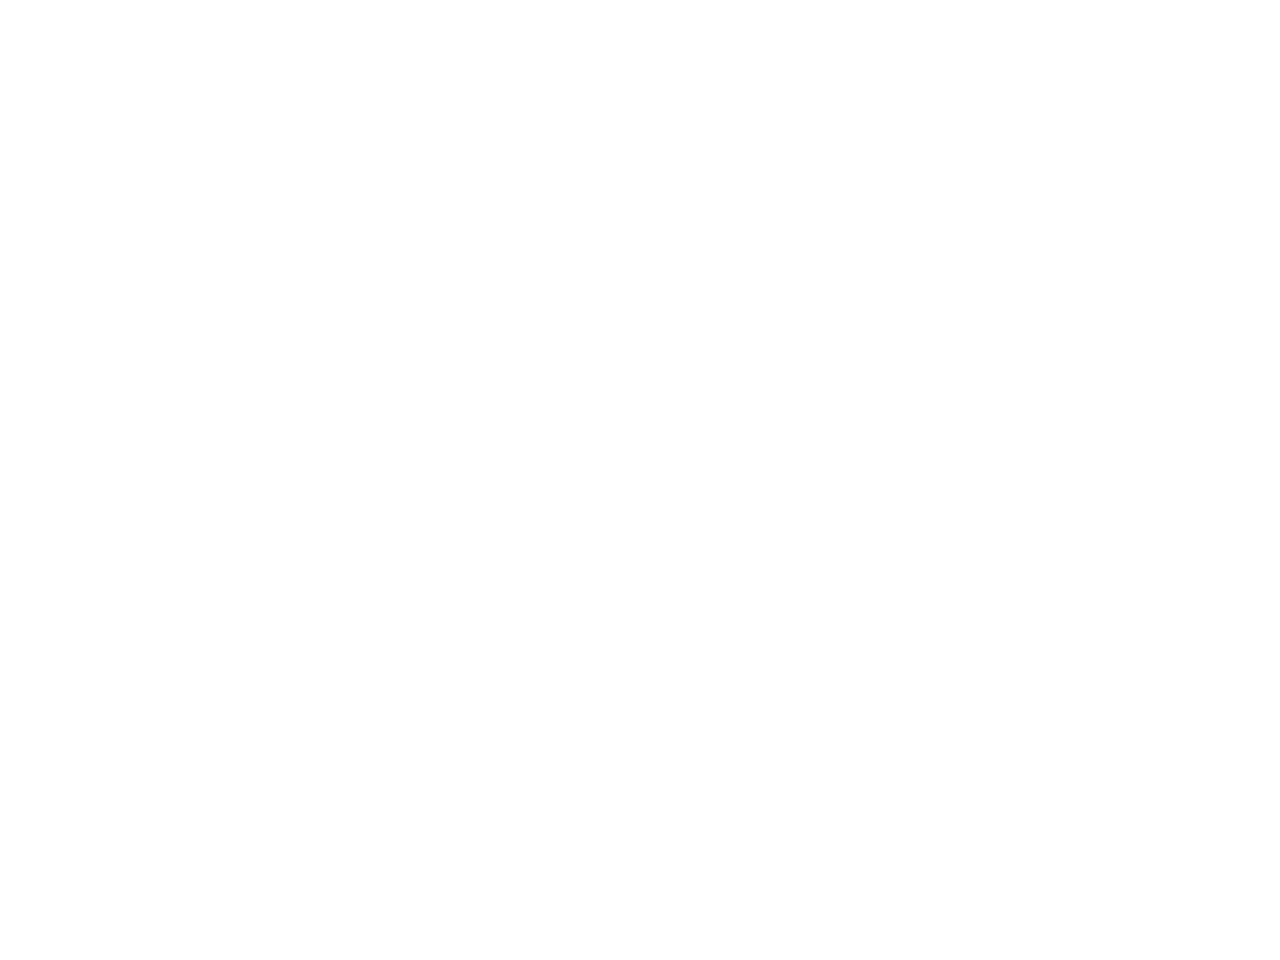

<IPython.core.display.Javascript object>


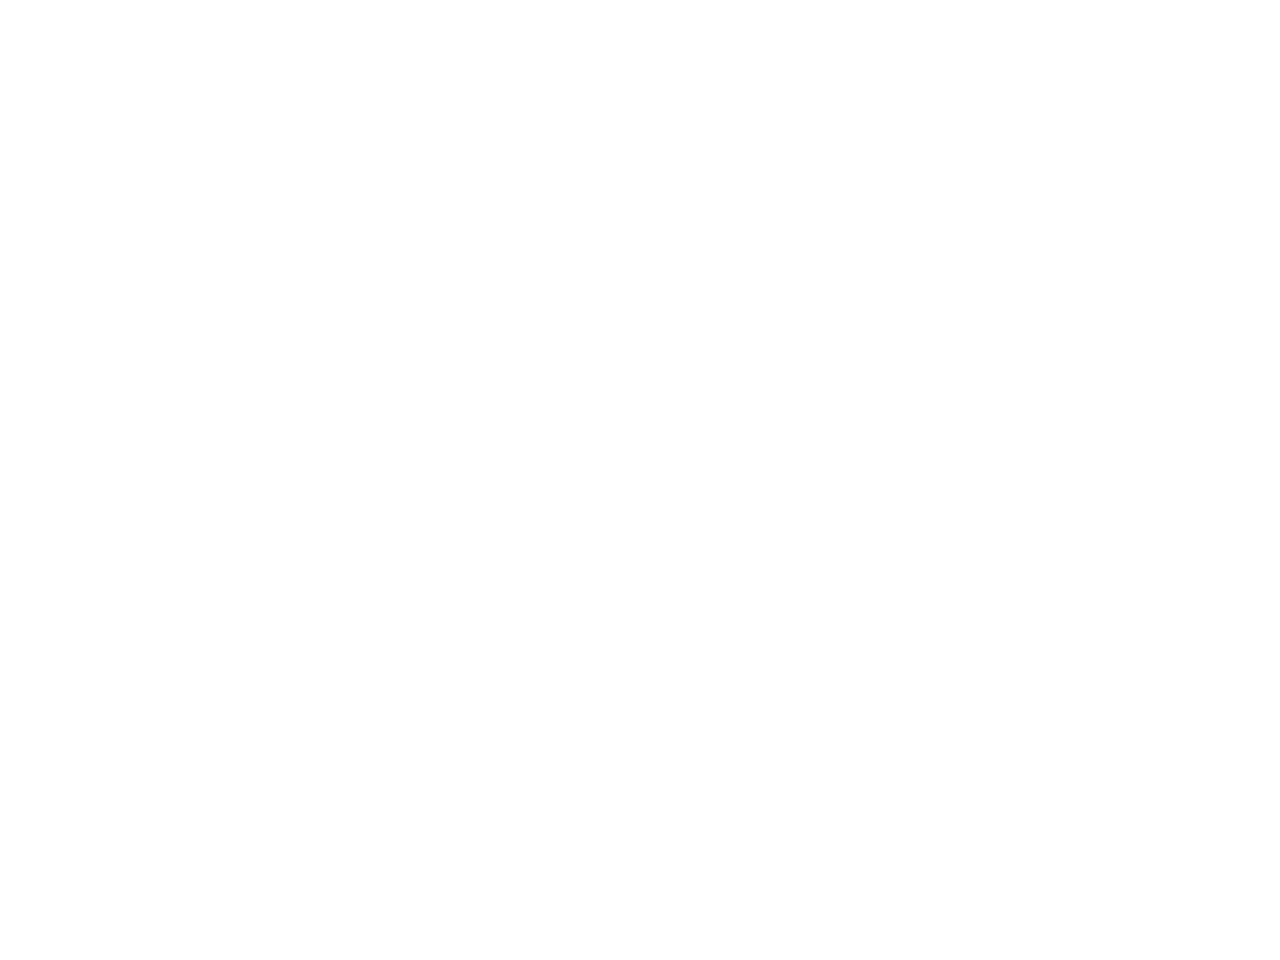

<IPython.core.display.Javascript object>


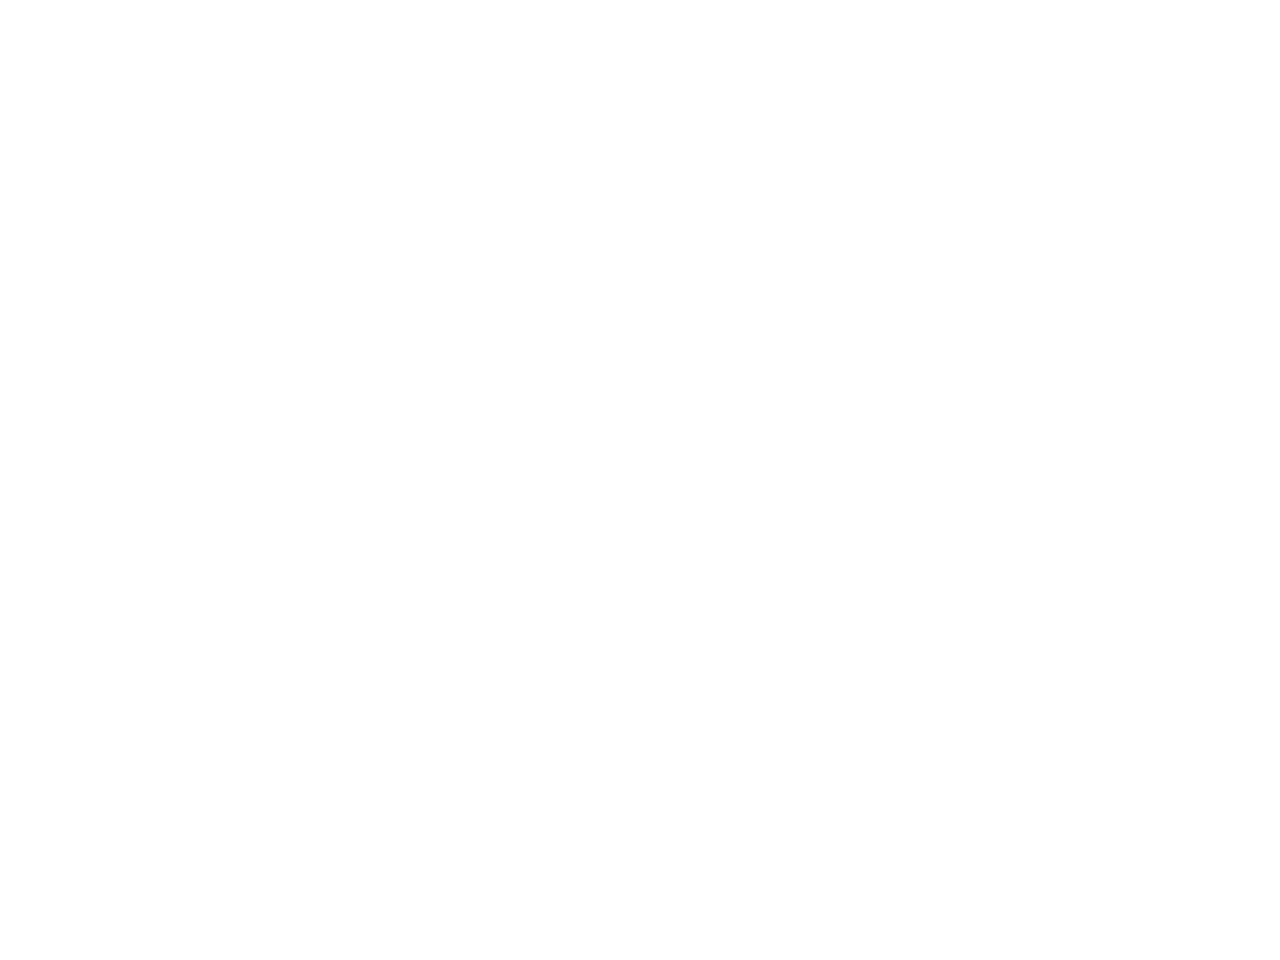

<IPython.core.display.Javascript object>


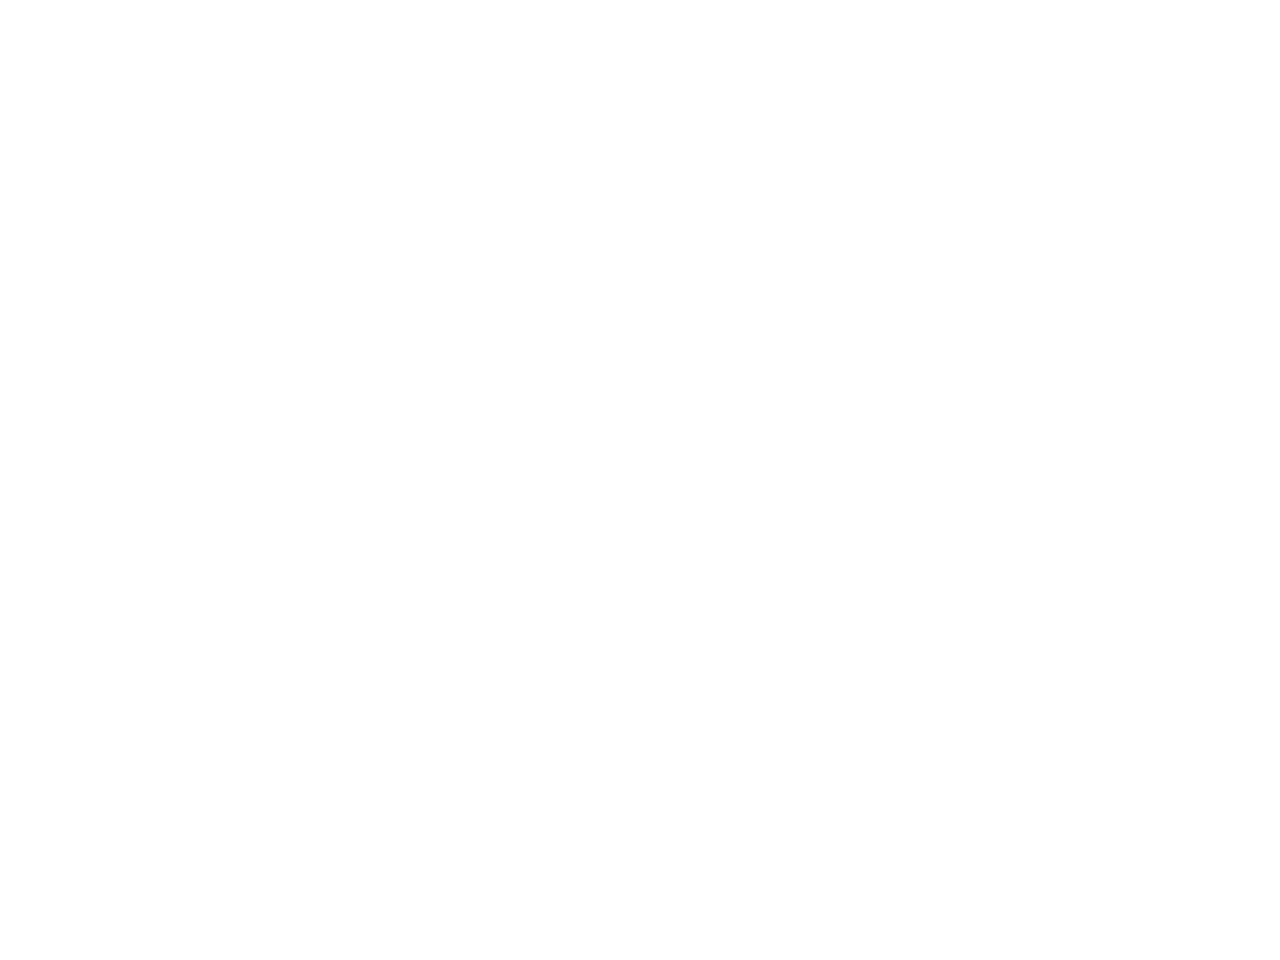

<IPython.core.display.Javascript object>


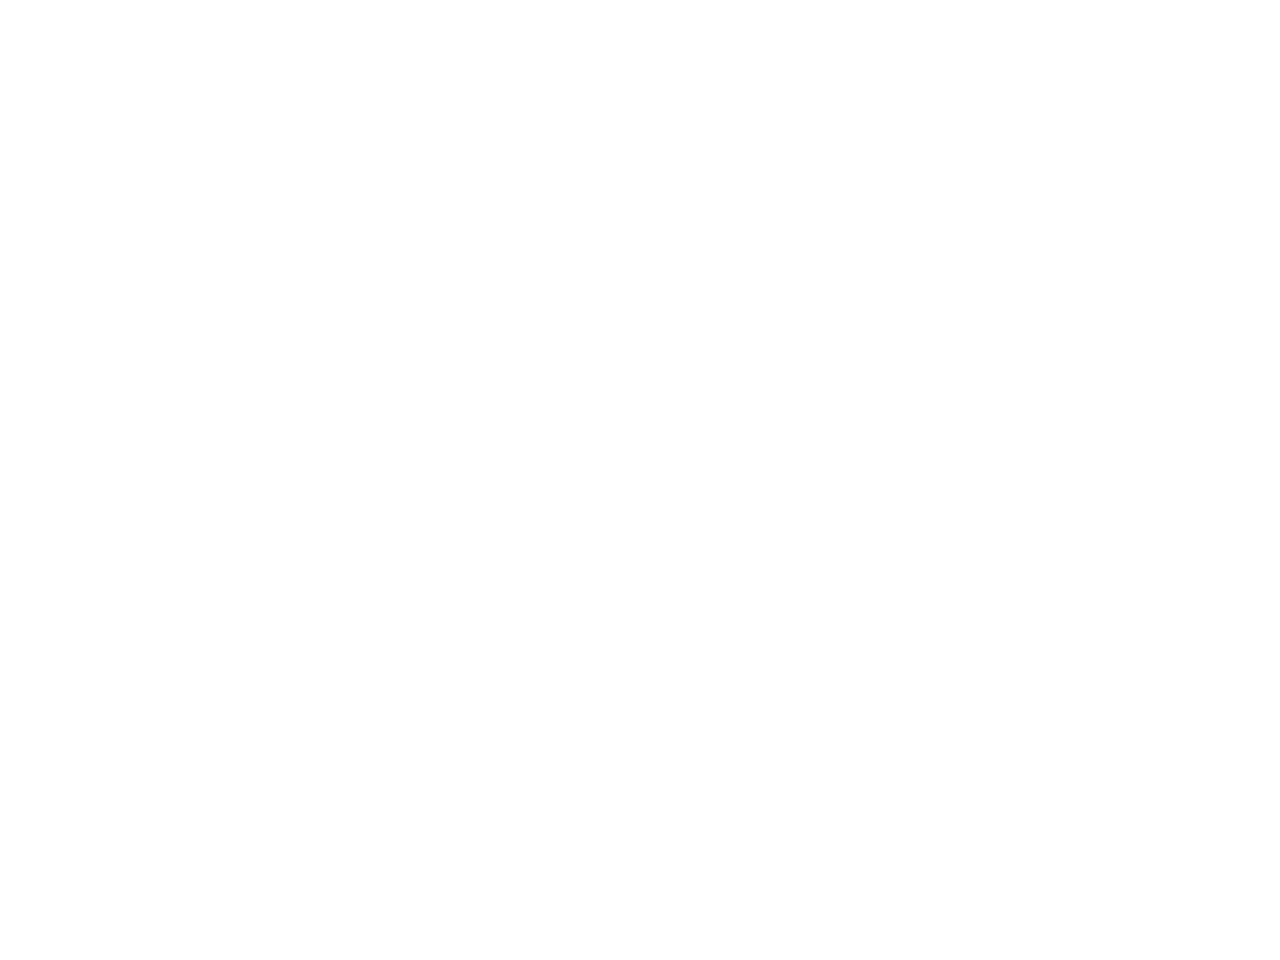

<IPython.core.display.Javascript object>


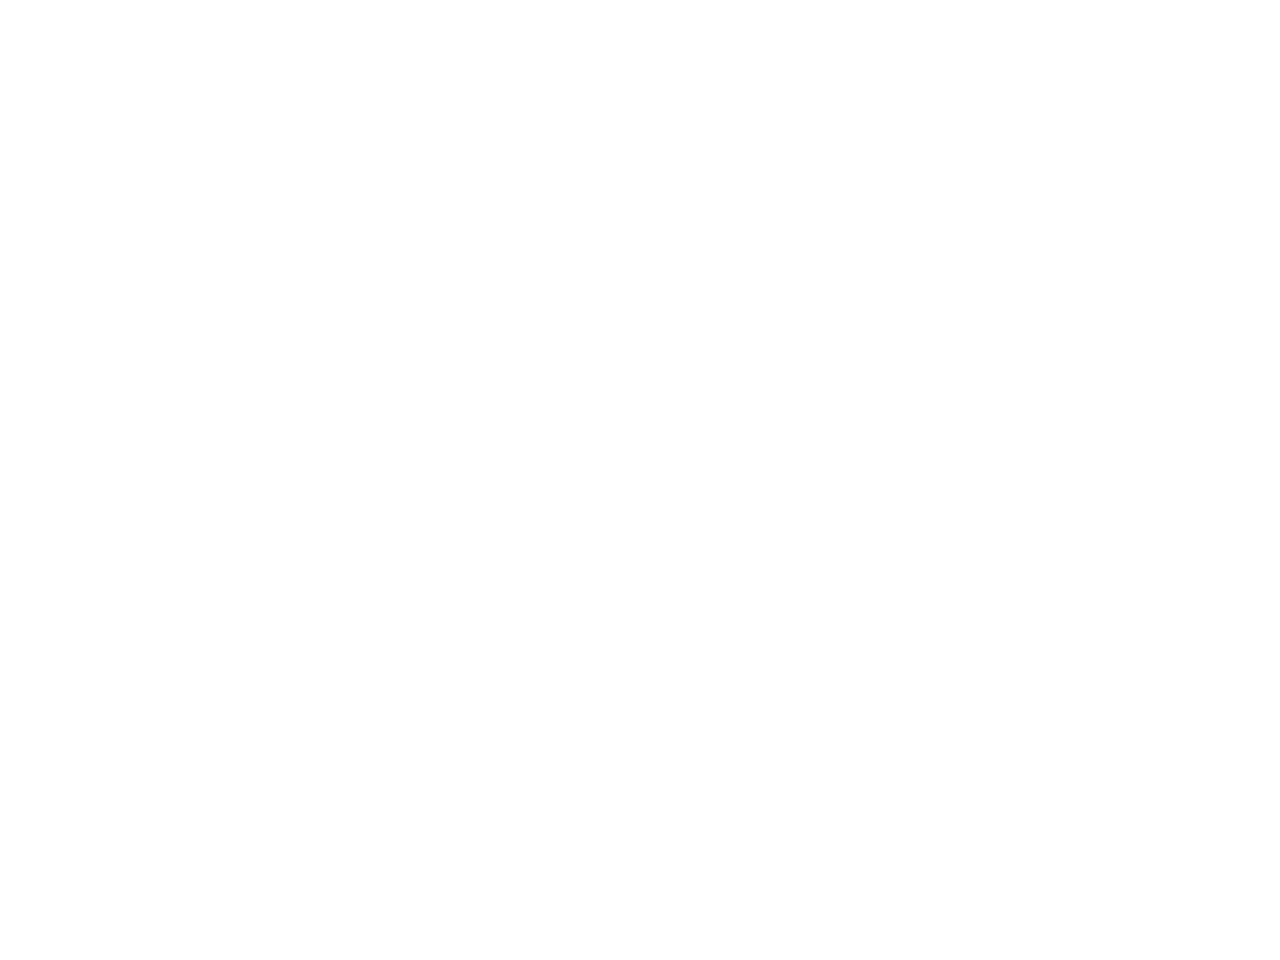

<IPython.core.display.Javascript object>


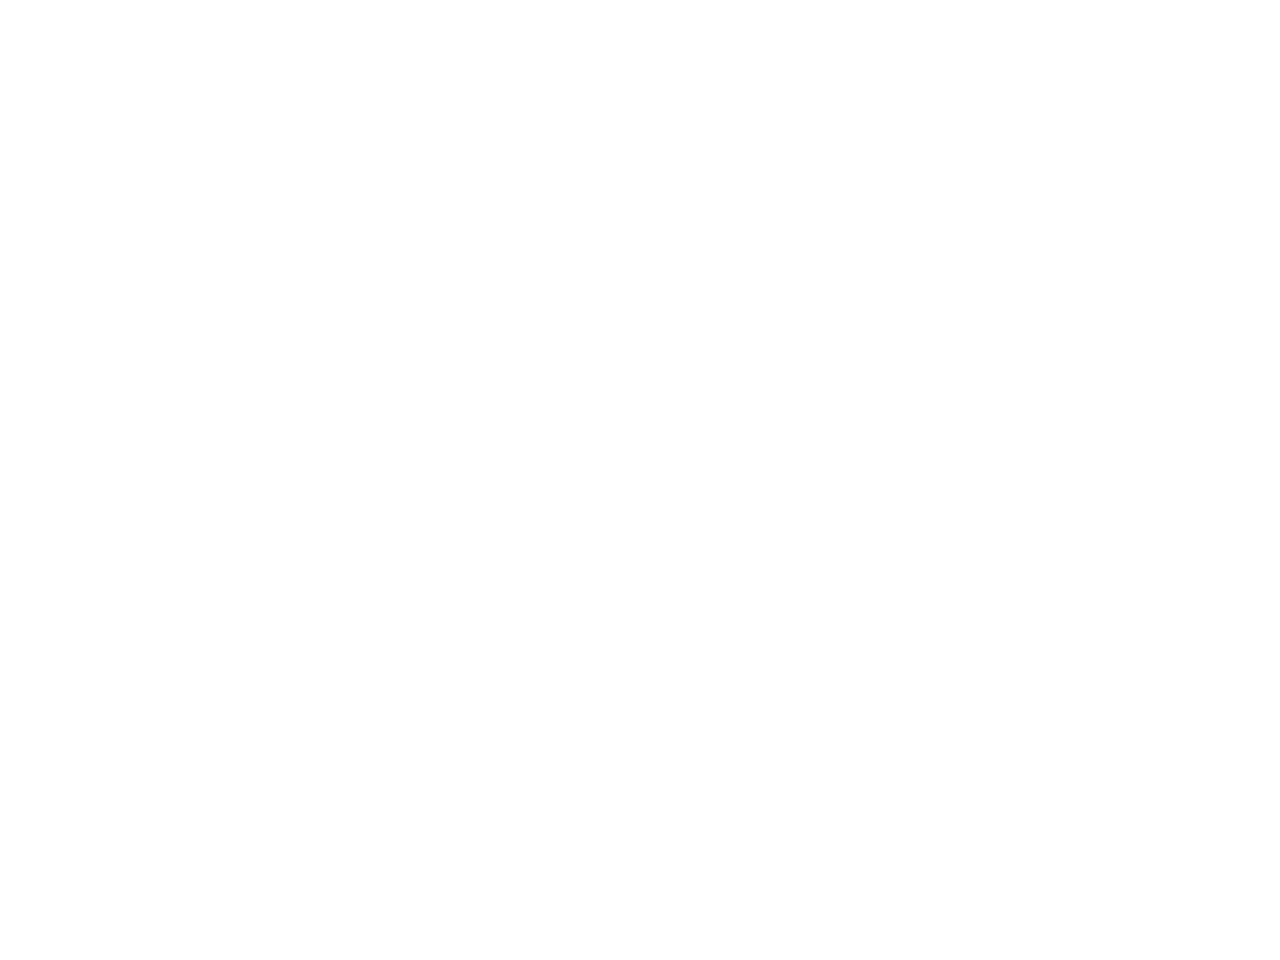

<IPython.core.display.Javascript object>


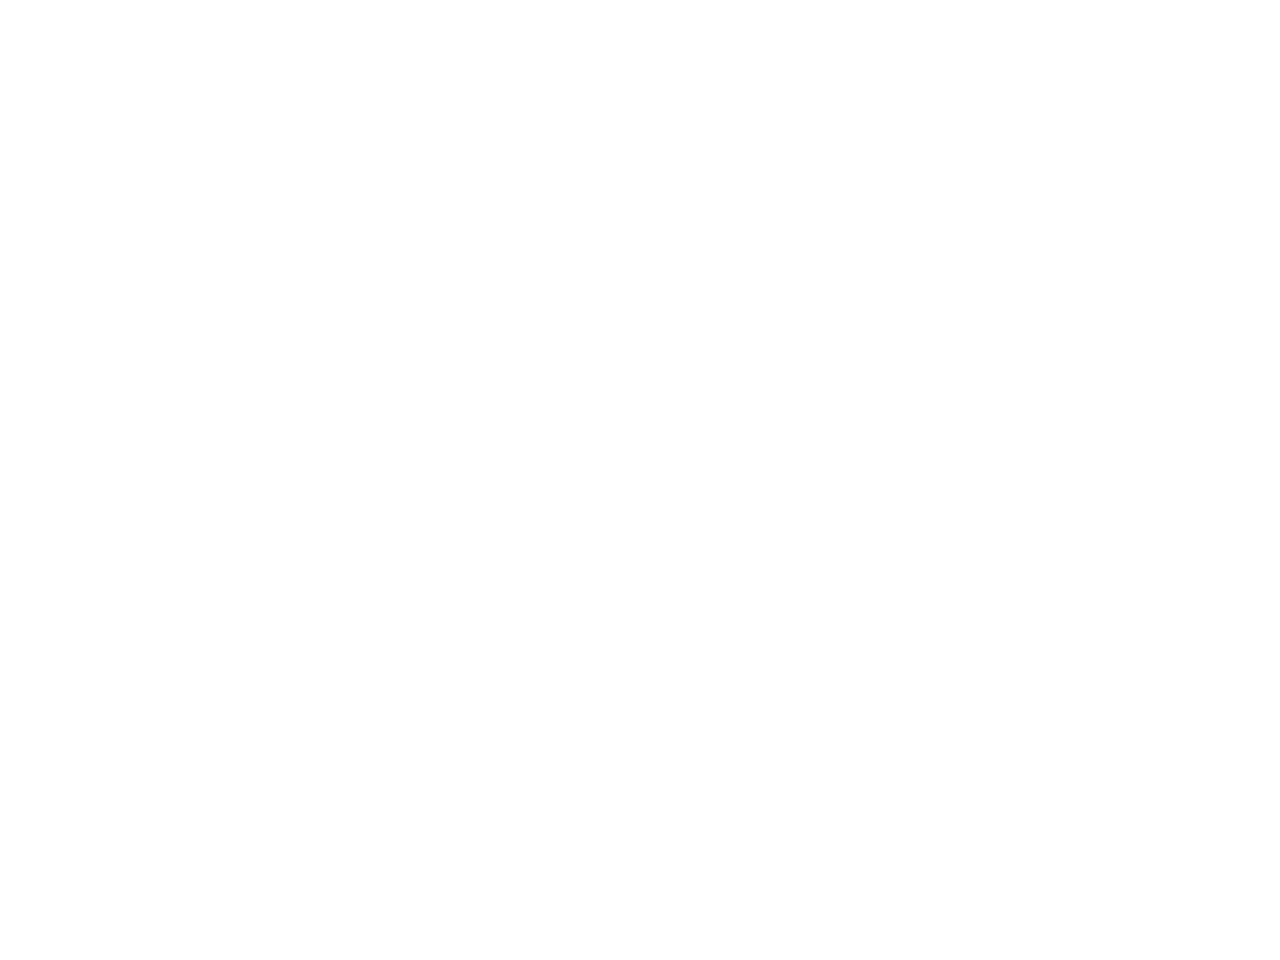

<IPython.core.display.Javascript object>


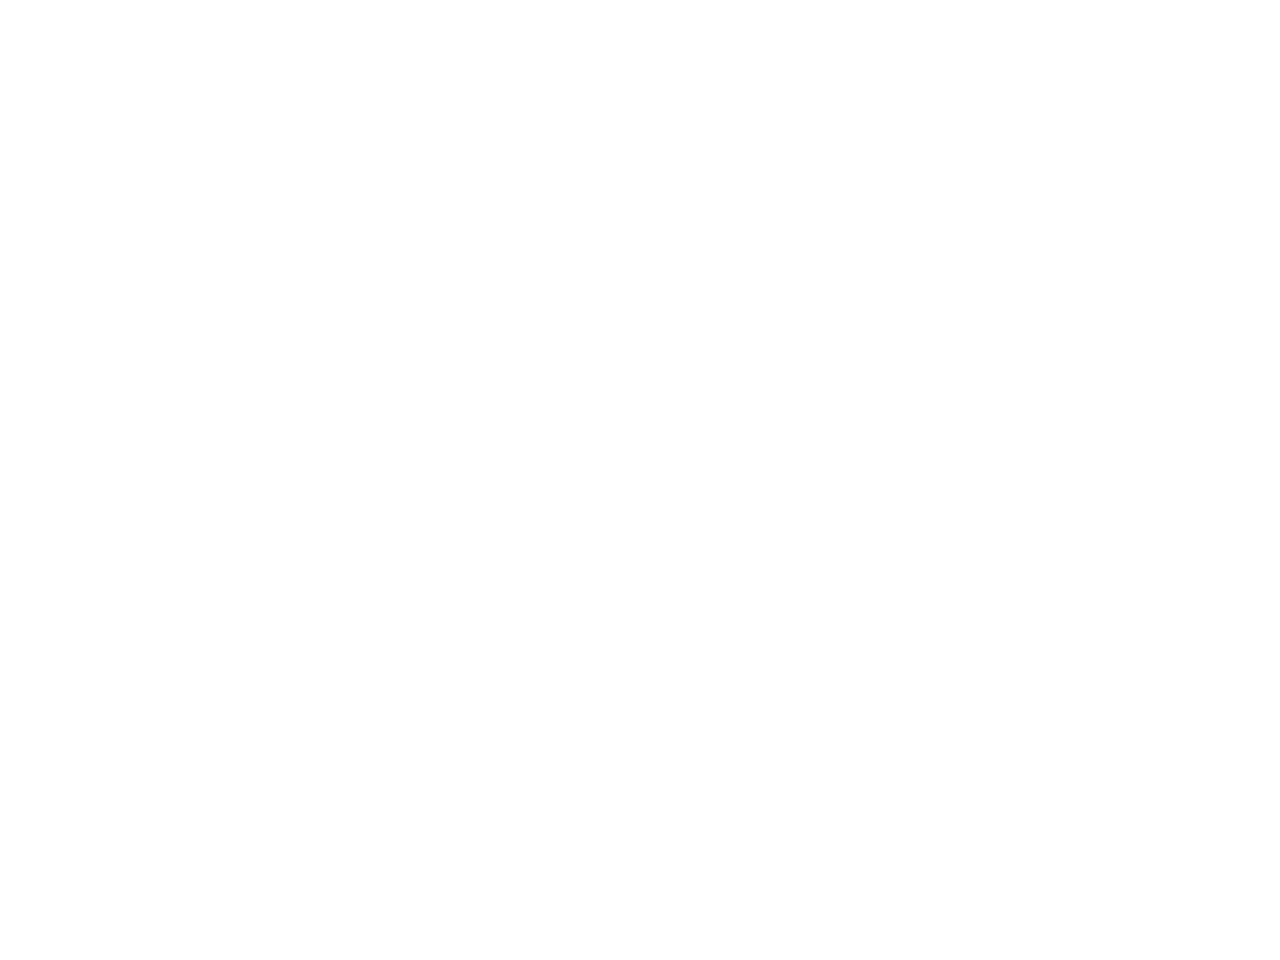

<IPython.core.display.Javascript object>


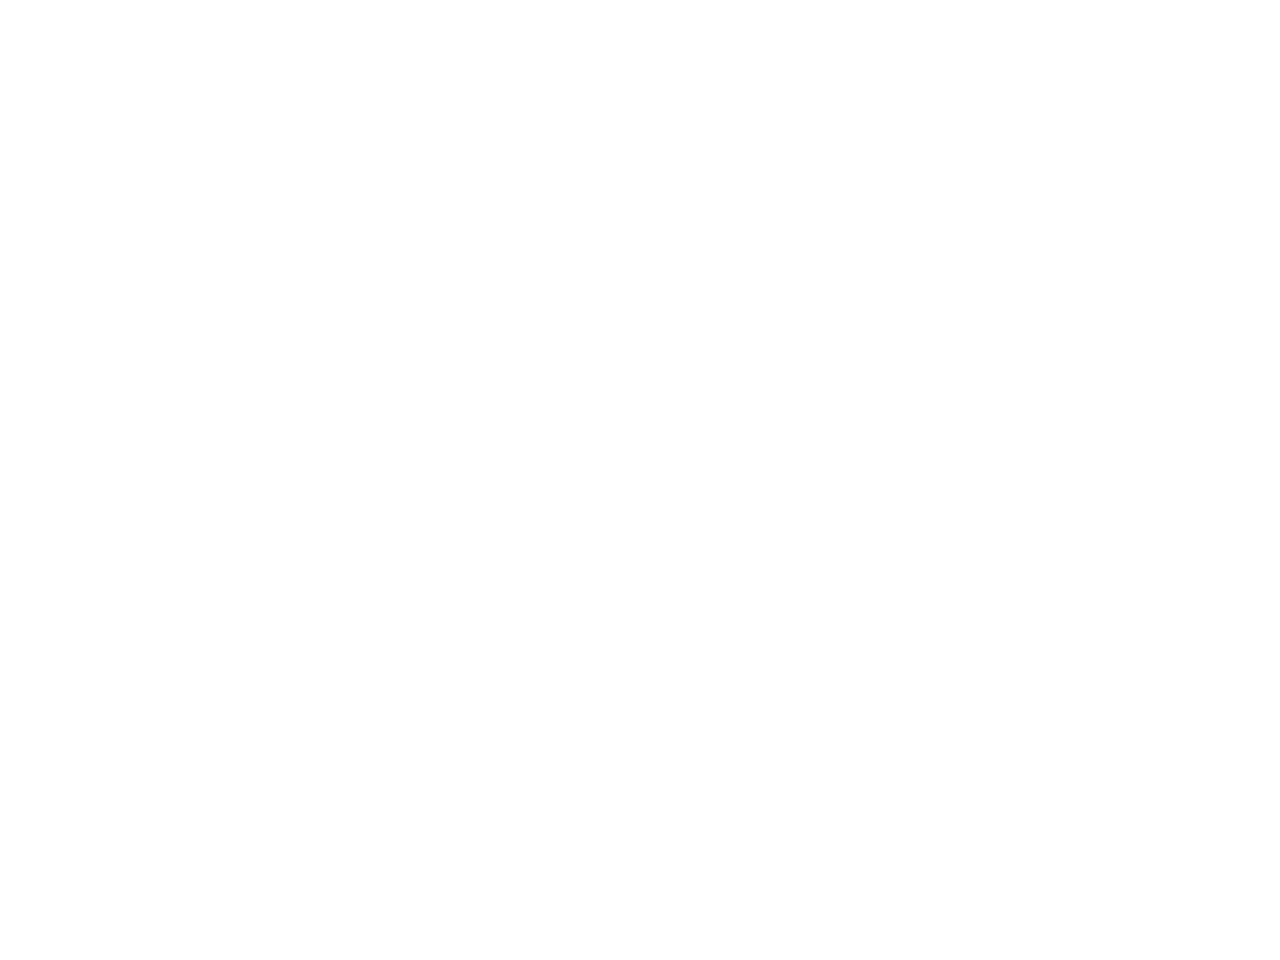

<IPython.core.display.Javascript object>


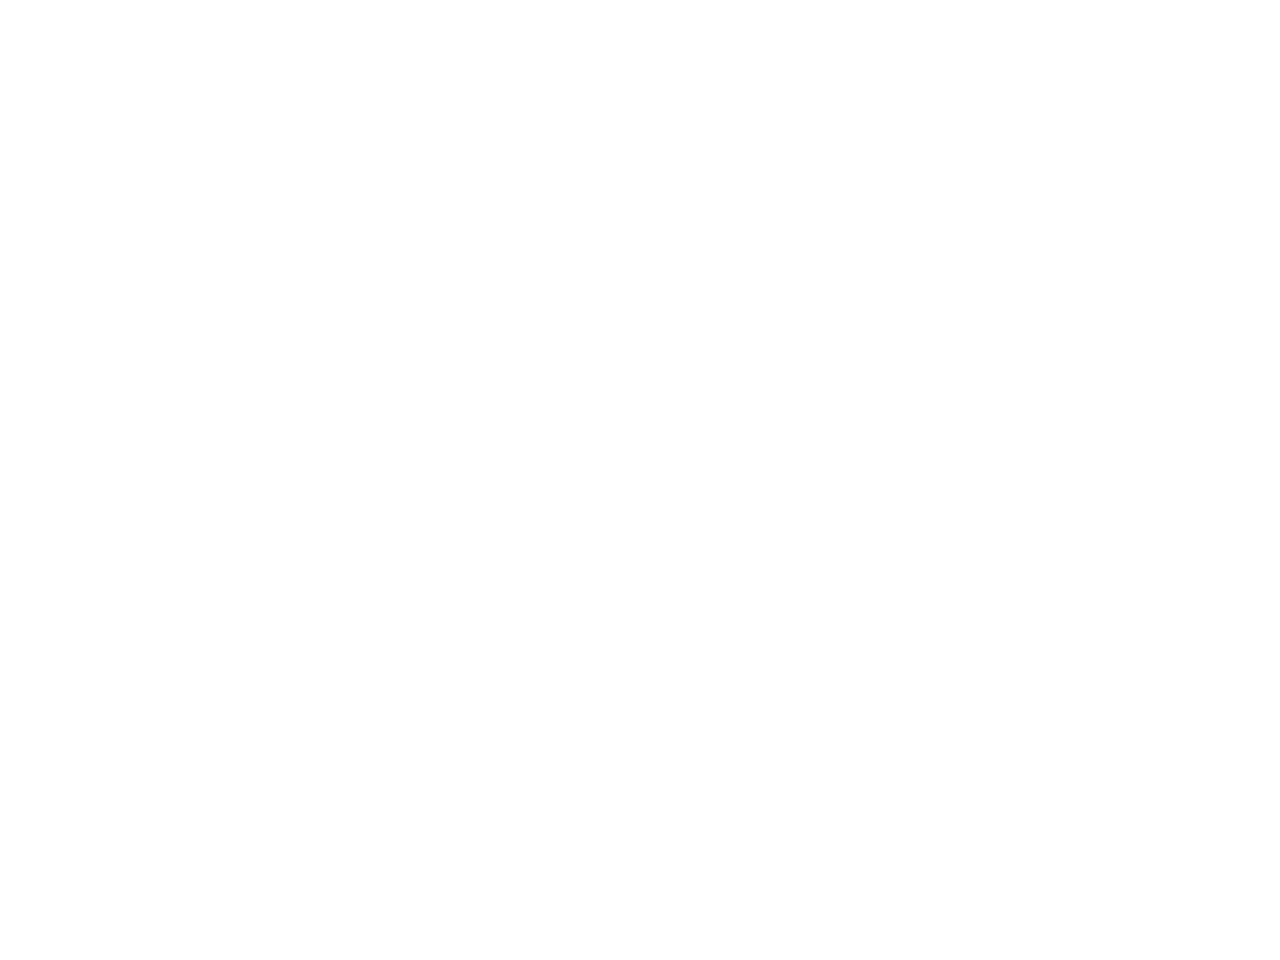

In [ ]:
def plot_communities(t):
    #plot the communities on the network
    node_color = stability.stability_results.iloc[t]['community_id']
    plt.figure()

    nx.draw_networkx_nodes(G, pos=pos,node_color=node_color, node_size = 100, cmap=plt.get_cmap('tab20'))
    nx.draw_networkx_edges(G, pos=pos,width = 0.5, edge_color='0.5')
    plt.axis('off')
    plt.title(str(r'$log_{10}(time) =$ ')+ str(np.round(np.log10(times[t]),2)) +', with ' + str(stability.stability_results.iloc[t]['number_of_communities'])+' communities')
    plt.savefig('communities/time_'+str(t)+'.svg')
    plt.close()

#create a subfolder to store images
import os as os
if not os.path.isdir('communities'):
    os.mkdir('communities')

#plot the communities at each Markov time
for t in range(len(times)):
    plot_communities(t)